## SECTION 0: IMPORT DATA

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
def load_data(csv_path, pkl_path=None, force_reload=False):
    """
    Load data from CSV, with optional pickle caching.
    """

    if pkl_path is None:
        pkl_path = csv_path.rsplit('.', 1)[0] + '.pkl'

    # Try to load from pickle if it exists and force_reload is False
    if not force_reload and os.path.exists(pkl_path):
        try:
            print(f"Loading cached data from {pkl_path}")
            return pd.read_pickle(pkl_path)
        except Exception as e:
            print(f"Error loading pickle file: {e}")
            print("Falling back to CSV loading")

    print(f"Loading data from {csv_path}")
    df = pd.read_csv(csv_path)

    df.to_pickle(pkl_path)

    return df


In [4]:
os.chdir('/content/drive/MyDrive/DATASCI210/data')

In [ ]:
# Load the data
books_df = load_data('books_data.csv')
ratings_df = load_data('books_rating.csv')

# SECTION 1: EDA

#### SECTION 1.1: SUMMARY INF0

Here are the fields available in our two data sources:

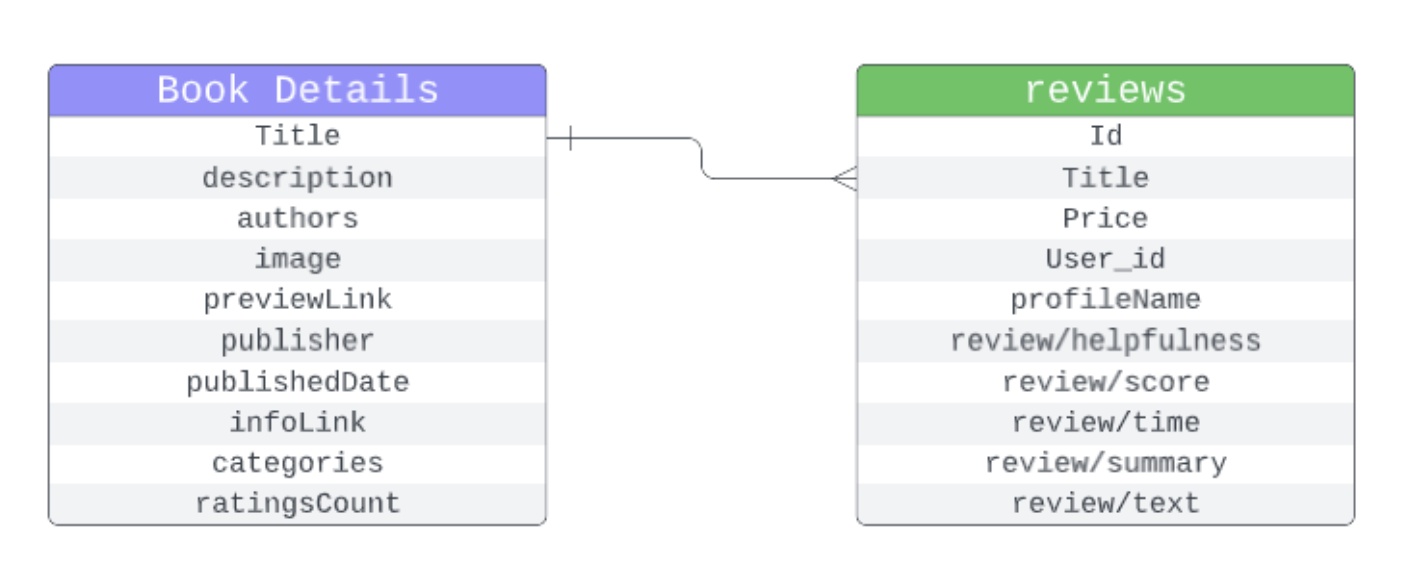

In [ ]:

print("Books Dataset Info:")
print(books_df.info())


Books Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB
None


In [ ]:
books_df.head()


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [ ]:
print("Ratings Dataset Info:")
print(ratings_df.info())


Ratings Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB
None


In [ ]:
ratings_df.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [ ]:
def analyze_null_values(df, dataset_name="Dataset"):
    """
    Analyze and display null values in each column of a dataframe.

    Args:
        df (pd.DataFrame): Input dataframe
        dataset_name (str): Name of dataset for display purposes

    Returns:
        pd.Series: Percentage of null values per column
    """
    # Calculate null percentages
    null_percentages = (df.isnull().sum() / len(df) * 100).round(2)

    # Create a summary dataframe
    null_summary = pd.DataFrame({
        'Column': null_percentages.index,
        'Null Count': df.isnull().sum(),
        'Null %': null_percentages,
        'Data Type': df.dtypes
    })

    # Sort by null percentage descending
    null_summary = null_summary.sort_values('Null %', ascending=False)

    print(f"\n{dataset_name} Null Value Analysis:")
    print("-" * 80)
    print(null_summary)
    print("-" * 80)
    print(f"Total rows in dataset: {len(df):,}")

    return null_summary


In [ ]:
# Analyze both datasets
ratings_nulls = analyze_null_values(ratings_df, "Ratings")
books_nulls = analyze_null_values(books_df, "Books")


Ratings Null Value Analysis:
--------------------------------------------------------------------------------
                                Column  Null Count  Null % Data Type
Price                            Price     2518829   83.96   float64
User_id                        User_id      561787   18.73    object
profileName                profileName      561905   18.73    object
Title                            Title         208    0.01    object
review/summary          review/summary         407    0.01    object
Id                                  Id           0    0.00    object
review/helpfulness  review/helpfulness           0    0.00    object
review/score              review/score           0    0.00   float64
review/time                review/time           0    0.00     int64
review/text                review/text           8    0.00    object
--------------------------------------------------------------------------------
Total rows in dataset: 3,000,000

Books Null Valu

We notice that there a lot of records which are missing important description info. We can potentially get this from the book web link or another source.

In [ ]:
# Find example rows where infoLink is not null but description is null
example_rows = books_df[
    books_df['infoLink'].notna() &
    books_df['description'].isnull()
].head()

print("Sample rows with missing description but present infoLink:")
print("-" * 80)
for _, row in example_rows.iterrows():
    print("\nTitle:", row['Title'])
    print("Authors:", row['authors'])
    print("InfoLink:", row['infoLink'])
    print("Published Date:", row['publishedDate'])
    print("Categories:", row['categories'])
    print("-" * 40)

Sample rows with missing description but present infoLink:
--------------------------------------------------------------------------------

Title: Its Only Art If Its Well Hung!
Authors: ['Julie Strain']
InfoLink: http://books.google.nl/books?id=DykPAAAACAAJ&dq=Its+Only+Art+If+Its+Well+Hung!&hl=&source=gbs_api
Published Date: 1996
Categories: ['Comics & Graphic Novels']
----------------------------------------

Title: Nation Dance: Religion, Identity and Cultural Difference in the Caribbean
Authors: ['Edward Long']
InfoLink: http://books.google.nl/books?id=399SPgAACAAJ&dq=Nation+Dance:+Religion,+Identity+and+Cultural+Difference+in+the+Caribbean&hl=&source=gbs_api
Published Date: 2003-03-01
Categories: nan
----------------------------------------

Title: The Overbury affair (Avon)
Authors: ['Miriam Allen De Ford']
InfoLink: http://books.google.nl/books?id=mHLTngEACAAJ&dq=The+Overbury+affair+(Avon)&hl=&source=gbs_api
Published Date: 1960
Categories: nan
---------------------------------

## SECTION 1.2: RATINGS BY USER

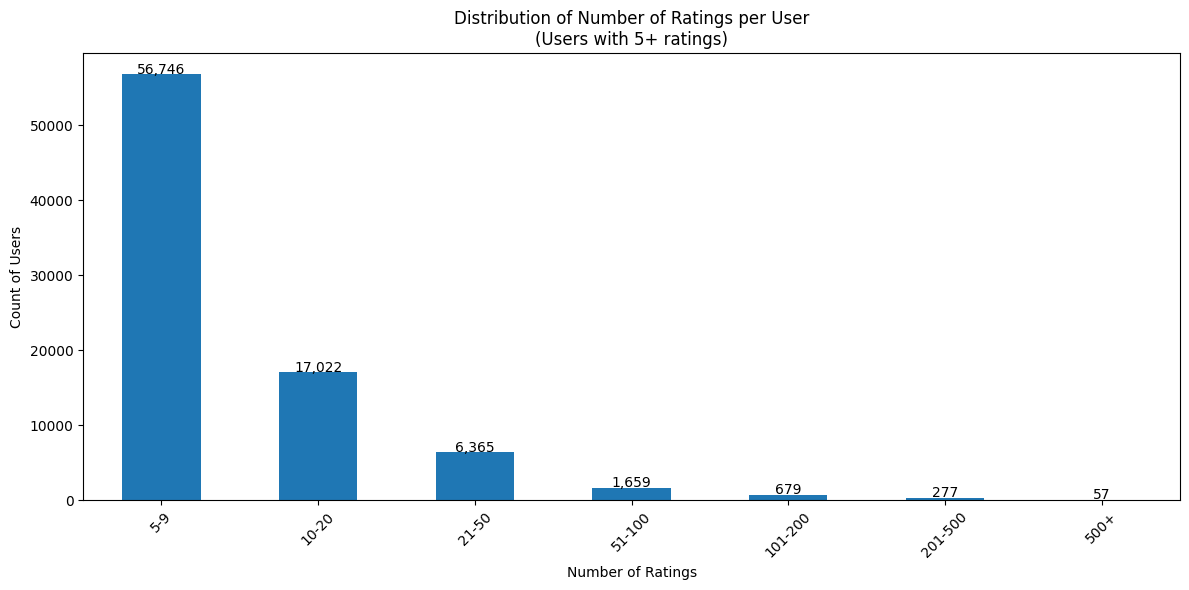

In [ ]:
# Count ratings per user
user_rating_counts = ratings_df['User_id'].value_counts()

# Filter for users with at least 5 ratings for the plot
plot_users_counts = user_rating_counts[user_rating_counts >= 5]

# Create custom bins for the plot
bins = [4, 10, 20, 50, 100, 200, 500, float('inf')]
labels = ['5-9', '10-20', '21-50', '51-100', '101-200', '201-500', '500+']

# Bin the data
binned_counts = pd.cut(plot_users_counts, bins=bins, labels=labels)
binned_counts = binned_counts.value_counts().sort_index()

# Bar plot
plt.figure(figsize=(12, 6))
binned_counts.plot(kind='bar')
plt.title('Distribution of Number of Ratings per User\n(Users with 5+ ratings)')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Users')
plt.xticks(rotation=45)

for i, v in enumerate(binned_counts):
   plt.text(i, v + 100, f'{v:,}', ha='center')

plt.tight_layout()
plt.show()


In [ ]:
# Print statistics for ALL users
print("\nDistribution of all users by rating count:")
print(f"Users with 1-4 ratings: {len(user_rating_counts[user_rating_counts < 5]):,} ({len(user_rating_counts[user_rating_counts < 5])/len(user_rating_counts)*100:.1f}%)")
for label, count in binned_counts.items():
   print(f"{label}: {count:,} users ({count/len(user_rating_counts)*100:.1f}%)")

print(f"\nTotal number of users: {len(user_rating_counts):,}")
print(f"Average ratings per user: {user_rating_counts.mean():.1f}")
print(f"Median ratings per user: {user_rating_counts.median():.1f}")


Distribution of all users by rating count:
Users with 1-4 ratings: 926,167 (91.8%)
5-9: 56,746 users (5.6%)
10-20: 17,022 users (1.7%)
21-50: 6,365 users (0.6%)
51-100: 1,659 users (0.2%)
101-200: 679 users (0.1%)
201-500: 277 users (0.0%)
500+: 57 users (0.0%)

Total number of users: 1,008,972
Average ratings per user: 2.4
Median ratings per user: 1.0


Most users have less than five ratings.

In [ ]:
def analyze_ratings_distribution():
   """
   Analyze the distribution of user ratings
   """
   ratings = ratings_df['review/score']

   # Basic statistics
   print("Basic Rating Statistics:")
   print("-" * 80)
   print(ratings.describe())

   # Value counts
   print("\nRating Distribution:")
   print("-" * 80)
   counts = ratings.value_counts().sort_index()
   total = len(ratings)

   for rating, count in counts.items():
       percentage = (count/total) * 100
       print(f"Rating {rating:.1f}: {count:,} reviews ({percentage:.1f}%)")

   # Calculate mean and median
   print(f"\nMean rating: {ratings.mean():.2f}")
   print(f"Median rating: {ratings.median():.2f}")

   # Show how many unique values there are
   print(f"\nNumber of unique rating values: {len(ratings.unique())}")
   if len(ratings.unique()) > 5:
       print("\nUnique rating values:")
       print(sorted(ratings.unique()))

analyze_ratings_distribution()

Basic Rating Statistics:
--------------------------------------------------------------------------------
count    3.000000e+06
mean     4.215289e+00
std      1.203054e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: review/score, dtype: float64

Rating Distribution:
--------------------------------------------------------------------------------
Rating 1.0: 201,688 reviews (6.7%)
Rating 2.0: 151,058 reviews (5.0%)
Rating 3.0: 254,295 reviews (8.5%)
Rating 4.0: 585,616 reviews (19.5%)
Rating 5.0: 1,807,343 reviews (60.2%)

Mean rating: 4.22
Median rating: 5.00

Number of unique rating values: 5


In [ ]:
# Merge the dataframes
merged_df = ratings_df.merge(books_df, on='Title', how='left', indicator=True)

# Keep only matched records and drop the merge indicator (although all records match)
merged_df = merged_df[merged_df['_merge'] == 'both'].drop('_merge', axis=1)

print("\nColumns in merged dataset:")
print(merged_df.columns.tolist())


Columns in merged dataset:
['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness', 'review/score', 'review/time', 'review/summary', 'review/text', 'description', 'authors', 'image', 'previewLink', 'publisher', 'publishedDate', 'infoLink', 'categories', 'ratingsCount']


In [ ]:
print(merged_df.shape)

(3000000, 19)


Looking at duplicates

In [ ]:
# Identify duplicate rows based on the combination of 'user_id', 'title', and 'authors'
duplicate_rows = merged_df[merged_df.duplicated(subset=['User_id', 'Title', 'authors'], keep=False)]

duplicate_rows = duplicate_rows.sort_values(by=['User_id', 'Title', 'authors'])

print(len(duplicate_rows))

1034686


## SECTION 1.3: REVIEW LENGTH

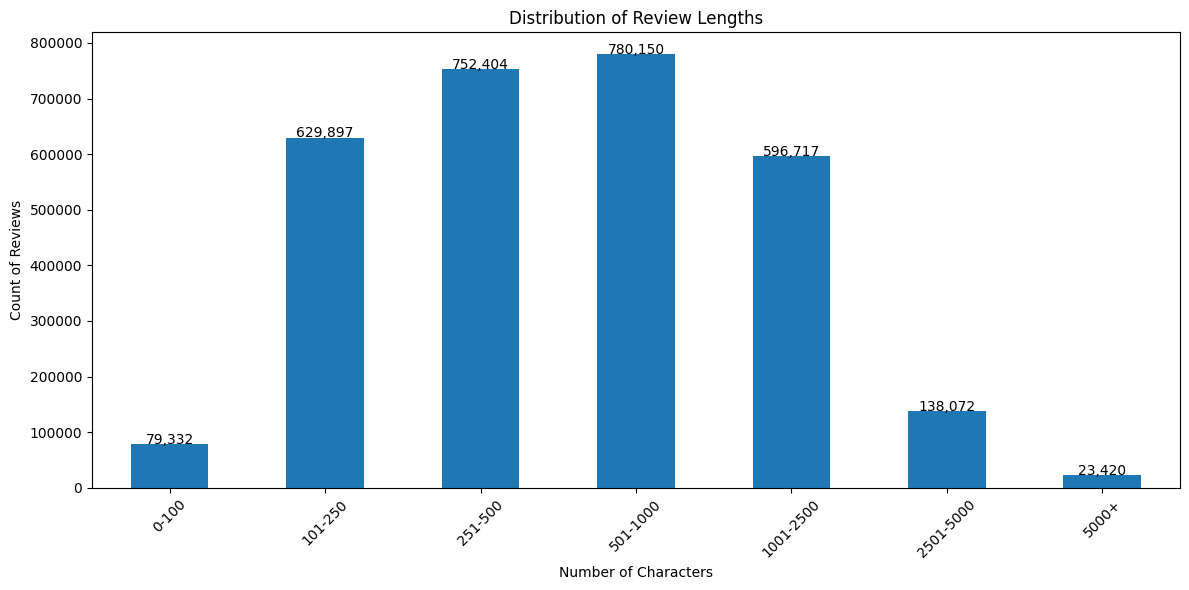

In [ ]:
# Calculate length of each review
merged_df['review_length'] = merged_df['review/text'].str.len()

# Custom bins for review lengths
bins = [0, 100, 250, 500, 1000, 2500, 5000, float('inf')]
labels = ['0-100', '101-250', '251-500', '501-1000', '1001-2500', '2501-5000', '5000+']

binned_lengths = pd.cut(merged_df['review_length'], bins=bins, labels=labels)
binned_counts = binned_lengths.value_counts().sort_index()

# Bar plot
plt.figure(figsize=(12, 6))
binned_counts.plot(kind='bar')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=45)

for i, v in enumerate(binned_counts):
   plt.text(i, v + 100, f'{v:,}', ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Print statistics
print("\nReview Length Statistics:")
print(f"Mean length: {merged_df['review_length'].mean():.0f} characters")
print(f"Median length: {merged_df['review_length'].median():.0f} characters")
print(f"Min length: {merged_df['review_length'].min():.0f} characters")
print(f"Max length: {merged_df['review_length'].max():.0f} characters")

print("\nDistribution across bins:")
for label, count in binned_counts.items():
   percentage = (count/len(merged_df)) * 100
   print(f"{label}: {count:,} reviews ({percentage:.1f}%)")


Review Length Statistics:
Mean length: 823 characters
Median length: 516 characters
Min length: 1 characters
Max length: 32576 characters

Distribution across bins:
0-100: 79,332 reviews (2.6%)
101-250: 629,897 reviews (21.0%)
251-500: 752,404 reviews (25.1%)
501-1000: 780,150 reviews (26.0%)
1001-2500: 596,717 reviews (19.9%)
2501-5000: 138,072 reviews (4.6%)
5000+: 23,420 reviews (0.8%)


## SECTION 1.4: BOOK CATEGORIES

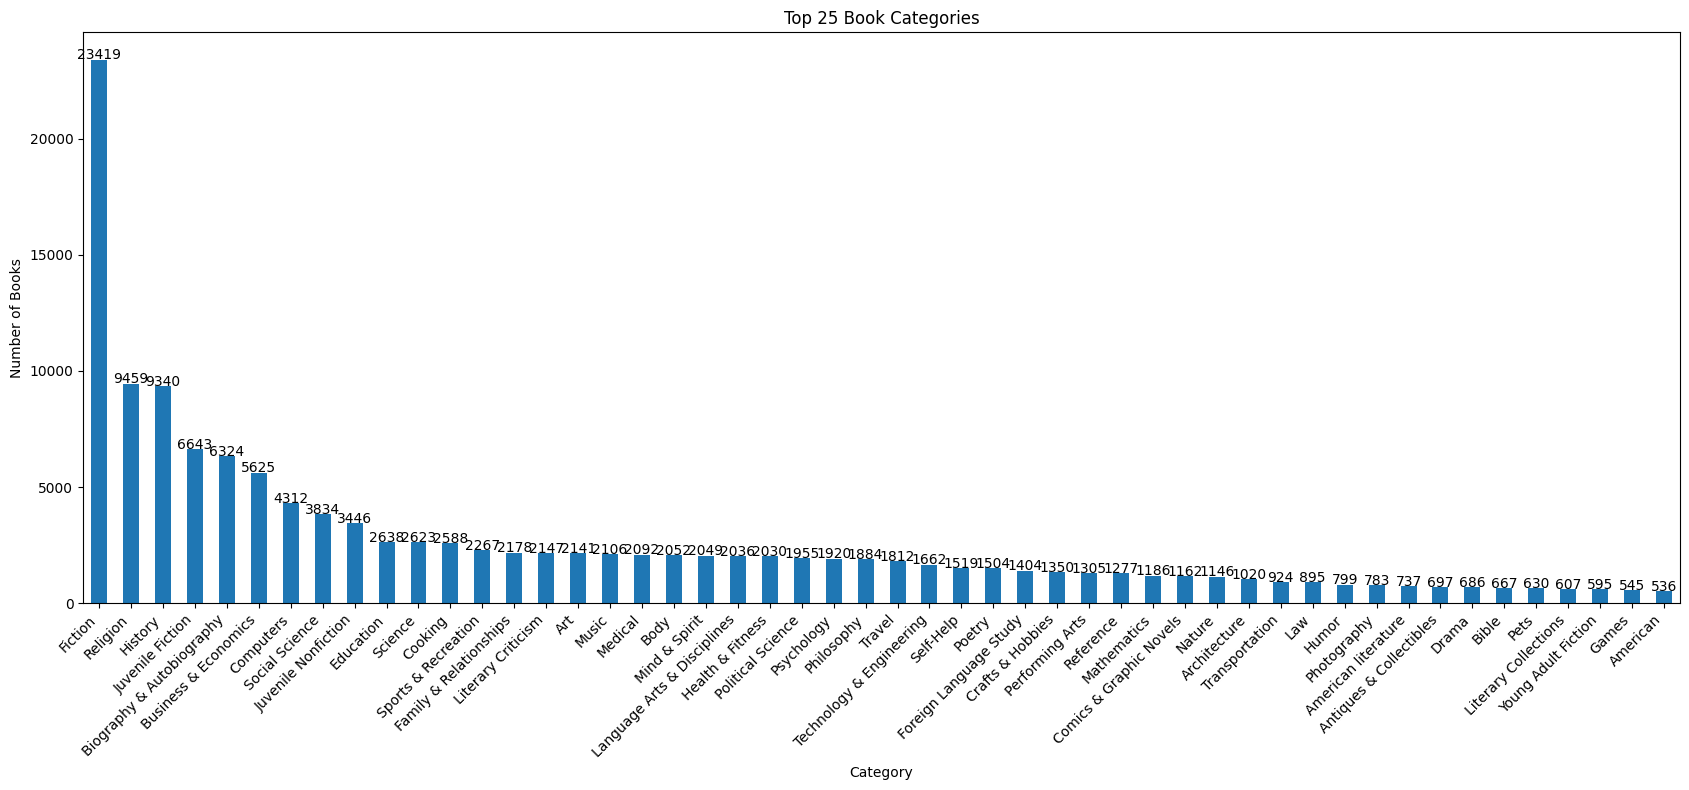

In [ ]:
# Count how many books have no categories at all
missing_categories = books_df['categories'].isna().sum()

# Extract and flatten category lists from non-missing rows
categories_series = books_df['categories'].dropna()

def extract_categories(cat_string):
    try:
        # Remove brackets and single quotes, split by comma b/c some books have more than one category
        cats = cat_string.strip('[]').replace("'", "").split(',')
        return [c.strip() for c in cats]
    except:
        return []

all_categories = []
for cats_str in categories_series:
    all_categories.extend(extract_categories(cats_str))

category_counts = pd.Series(all_categories).value_counts()

# Plot top 25 categories (arbitrary choice)
plt.figure(figsize=(17, 8))
category_counts.head(50).plot(kind='bar')
plt.title('Top 25 Book Categories')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(category_counts.head(50)):
    plt.text(i, v + 5, str(v), ha='center')

plt.tight_layout()
plt.show()


In [ ]:
top_n = 25
top_n_cats = set(category_counts.head(top_n).index)

# Create a parsed_categories column for all rows
books_df['parsed_categories'] = books_df['categories'].apply(
    lambda x: extract_categories(x) if pd.notna(x) else []
)

# A boolean indicating whether a book has at least one of the top N categories
books_df['has_top_category'] = books_df['parsed_categories'].apply(
    lambda cats: len(set(cats) & top_n_cats) > 0
)

num_books_outside_top_n = (~books_df['has_top_category']).sum()
pct_books_outside_top_n = num_books_outside_top_n / len(books_df) * 100

# Print statistics
print(f"\nTotal number of books: {len(books_df)}")
print(f"Books missing categories: {missing_categories} ({missing_categories/len(books_df)*100:.1f}%)")
print(f"Number of unique categories overall: {len(category_counts)}")
print(f"Books with no top-{top_n} categories: {num_books_outside_top_n} "
      f"({pct_books_outside_top_n:.1f}%)\n")

print(f"Top {top_n} categories by frequency:")
for cat, count in category_counts.head(top_n).items():
    print(f"  {cat}: {count} books")


Total number of books: 212404
Books missing categories: 41199 (19.4%)
Number of unique categories overall: 10990
Books with no top-25 categories: 107345 (50.5%)

Top 25 categories by frequency:
  Fiction: 23419 books
  Religion: 9459 books
  History: 9340 books
  Juvenile Fiction: 6643 books
  Biography & Autobiography: 6324 books
  Business & Economics: 5625 books
  Computers: 4312 books
  Social Science: 3834 books
  Juvenile Nonfiction: 3446 books
  Education: 2638 books
  Science: 2623 books
  Cooking: 2588 books
  Sports & Recreation: 2267 books
  Family & Relationships: 2178 books
  Literary Criticism: 2147 books
  Art: 2141 books
  Music: 2106 books
  Medical: 2092 books
  Body: 2052 books
  Mind & Spirit: 2049 books
  Language Arts & Disciplines: 2036 books
  Health & Fitness: 2030 books
  Political Science: 1955 books
  Psychology: 1920 books
  Philosophy: 1884 books


In [ ]:
# Extract categories for each row as a list:
def extract_categories(cat_string):
    if pd.isna(cat_string):
        return []
    try:
        return [c.strip().strip("'") for c in cat_string.strip('[]').split(',')]
    except:
        return []

books_df['parsed_categories'] = books_df['categories'].apply(extract_categories)

# 2. Top 50 categories by frequency
top_50_categories = set(category_counts.head(50).index)

# 3. For each book, check if it has at least one top category
def has_top_category(cats):
    # 'cats' is a list of categories for the book
    # return True if there's an intersection with top_50_categories
    return len(set(cats) & top_50_categories) > 0

books_df['has_top_category'] = books_df['parsed_categories'].apply(has_top_category)

# 4. Calculate how many books do *not* have any top category
num_books_outside_top_50 = (~books_df['has_top_category']).sum()
pct_books_outside_top_50 = num_books_outside_top_50 / len(books_df) * 100

# 5. Print summary
print(f"Total number of books: {len(books_df)}")
print(f"Books with no top-50 categories: {num_books_outside_top_50} ({pct_books_outside_top_50:.1f}%)")
print(f"Number of unique categories overall: {len(category_counts)}\n")

print("Top 50 categories:")
for cat, count in category_counts.head(50).items():
    print(f"{cat}: {count} books")


Total number of books: 212404
Books with no top-50 categories: 81967 (38.6%)
Number of unique categories overall: 10990

Top 50 categories:
Fiction: 23419 books
Religion: 9459 books
History: 9340 books
Juvenile Fiction: 6643 books
Biography & Autobiography: 6324 books
Business & Economics: 5625 books
Computers: 4312 books
Social Science: 3834 books
Juvenile Nonfiction: 3446 books
Education: 2638 books
Science: 2623 books
Cooking: 2588 books
Sports & Recreation: 2267 books
Family & Relationships: 2178 books
Literary Criticism: 2147 books
Art: 2141 books
Music: 2106 books
Medical: 2092 books
Body: 2052 books
Mind & Spirit: 2049 books
Language Arts & Disciplines: 2036 books
Health & Fitness: 2030 books
Political Science: 1955 books
Psychology: 1920 books
Philosophy: 1884 books
Travel: 1812 books
Technology & Engineering: 1662 books
Self-Help: 1519 books
Poetry: 1504 books
Foreign Language Study: 1404 books
Crafts & Hobbies: 1350 books
Performing Arts: 1305 books
Reference: 1277 books
Math

Let's see how many categories books have.

In [ ]:
# Count categories per book
def count_categories(cat_string):
   if pd.isna(cat_string):
       return 0
   try:
       # Remove brackets and split by comma
       cats = cat_string.strip('[]').replace("'", "").split(',')
       return len([c.strip() for c in cats])
   except:
       return 0

books_df['category_count'] = books_df['categories'].apply(count_categories)

# Print statistics
print("\nCategory count statistics:")
print(f"Books with no categories: {len(books_df[books_df['category_count'] == 0])}")
print("\nDistribution of number of categories per book:")
print(books_df['category_count'].value_counts().sort_index())


Category count statistics:
Books with no categories: 41199

Distribution of number of categories per book:
category_count
0     41199
1    165385
2      5418
3       325
4        52
5        25
Name: count, dtype: int64


In [ ]:
# Let's look at some books with exactly 2 categories
print("Books with exactly 2 categories:")
two_categories = books_df[books_df['categories'].apply(lambda x:
   len(str(x).strip('[]').replace("'", "").split(',')) == 2 if pd.notna(x) else False)]

# Display title and categories for a sample
print("\nSample of books with 2 categories:")
sample = two_categories[['Title', 'categories']].head(10)
for _, row in sample.iterrows():
   print(f"\nTitle: {row['Title']}")
   print(f"Categories: {row['categories']}")

Books with exactly 2 categories:

Sample of books with 2 categories:

Title: History of Magic and the Occult
Categories: ['Body, Mind & Spirit']

Title: Little One, Maid of Israel
Categories: ['Bible stories, English']

Title: Hidden History of the Kovno Ghetto
Categories: ['Holocaust, Jewish (1939-1945)']

Title: Death Dream
Categories: ['Body, Mind & Spirit']

Title: Screenwriter: Words Become Pictures/304506
Categories: ['Illumination of books and manuscripts, Dutch']

Title: Engendering Culture: Manhood and Womanhood In New Deal Public Art and Theater
Categories: ['Arts, American']

Title: Lost Cities of Africa and Arabia (The Lost City Series)
Categories: ['Body, Mind & Spirit']

Title: A wonder book for girls and boys
Categories: ['Mythology, Classical']

Title: Witches' Way, The
Categories: ['Body, Mind & Spirit']

Title: The Tao of I Ching: Way to Divination
Categories: ['Body, Mind & Spirit']


# SECTION 2: DATA CLEANING

## SECTION 2.1: LOADING AND MERGING

We first load our book dataframe and rating dataframe

In [ ]:
# Load the data
books_df = load_data('books_data.csv')
ratings_df = load_data('books_rating.csv')


Loading cached data from books_data.pkl
Loading cached data from books_rating.pkl


In [ ]:
print(books_df.shape)
print(ratings_df.shape)

(212404, 10)
(3000000, 10)


Merge the dataframes

In [ ]:
# Merge the dataframes
merged_df = ratings_df.merge(books_df, on='Title', how='left', indicator=True)

# Keep only matched records and drop the merge indicator (although all records match)
merged_df = merged_df[merged_df['_merge'] == 'both'].drop('_merge', axis=1)

print("\nColumns in merged dataset:")
print(merged_df.columns.tolist())

print(merged_df.shape)



Columns in merged dataset:
['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness', 'review/score', 'review/time', 'review/summary', 'review/text', 'description', 'authors', 'image', 'previewLink', 'publisher', 'publishedDate', 'infoLink', 'categories', 'ratingsCount']
(3000000, 19)


## SECTION 2.2: RENAMING AND REFORMATTING, DROPPING DUPLICATES

In [ ]:
def standardize_column_names(df):
    """
    Standardizes column names by:
    1. Adding underscores between lowercase and uppercase letters.
    2. Converting all column names to lowercase.
    3. Replacing slashes ('/') with underscores ('_').

    Args:
        df (pd.DataFrame): The input DataFrame whose columns will be standardized.

    Returns:
        pd.DataFrame: The DataFrame with standardized column names.
    """
    original_columns = df.columns.tolist()

    # Add underscores between lowercase and uppercase letters
    df.columns = df.columns.str.replace(r'([a-z])([A-Z])', r'\1_\2', regex=True)

    # Convert column names to lowercase
    df.columns = df.columns.str.lower()

    # Replace slashes ('/') with underscores ('_')
    df.columns = df.columns.str.replace('/', '_')

    # Log changes
    updated_columns = df.columns.tolist()
    print("Column name changes:")
    for old, new in zip(original_columns, updated_columns):
        if old != new:
            print(f"  - '{old}' renamed to '{new}'")

    return df


In [ ]:
# Apply the function
merged_df = standardize_column_names(merged_df)

# View the updated DataFrame
print("\nUpdated DataFrame columns:")
print(merged_df.columns)


Column name changes:
  - 'Id' renamed to 'id'
  - 'Title' renamed to 'title'
  - 'Price' renamed to 'price'
  - 'User_id' renamed to 'user_id'
  - 'profileName' renamed to 'profile_name'
  - 'review/helpfulness' renamed to 'review_helpfulness'
  - 'review/score' renamed to 'review_score'
  - 'review/time' renamed to 'review_time'
  - 'review/summary' renamed to 'review_summary'
  - 'review/text' renamed to 'review_text'
  - 'previewLink' renamed to 'preview_link'
  - 'publishedDate' renamed to 'published_date'
  - 'infoLink' renamed to 'info_link'
  - 'ratingsCount' renamed to 'ratings_count'

Updated DataFrame columns:
Index(['id', 'title', 'price', 'user_id', 'profile_name', 'review_helpfulness',
       'review_score', 'review_time', 'review_summary', 'review_text',
       'description', 'authors', 'image', 'preview_link', 'publisher',
       'published_date', 'info_link', 'categories', 'ratings_count'],
      dtype='object')


Fixing the review date field

In [ ]:
from datetime import datetime

def convert_unix_to_date(df, column_name):
    """
    Converts a column with Unix time (Epoch time) to a human-readable date format (YYYY-MM-DD).
    """

    # Convert Unix time to date (only YYYY-MM-DD)
    df[column_name] = pd.to_datetime(df[column_name], unit='s').dt.date

    return df


In [ ]:
# Apply the function to the 'review/time' column
merged_df = convert_unix_to_date(merged_df, 'review_time')

# Check the result
print(merged_df[['review_time']].head())


  review_time
0  1999-10-23
1  2004-09-21
2  2004-03-09
3  2004-07-25
4  2005-02-10


Fix helpfulness field

In [ ]:
def extract_helpfulness_number(helpfulness_str):
    parts = str(helpfulness_str).split('/')
    return int(parts[0]) if parts[0].isdigit() else 0


In [ ]:
# Apply the function to 'review_helpfulness' using .loc
merged_df.loc[:, 'review_helpfulness'] = merged_df['review_helpfulness'].apply(extract_helpfulness_number)


Taking care of duplicates

In [ ]:
def drop_bad_rows(df, subset_cols):
    """
    Cleans the dataset by:
    1. Dropping rows with no description.
    2. Dropping duplicate rows based on a subset of columns.

    Args:
        df (pd.DataFrame): The input DataFrame.
        subset_cols (list): The columns to use for identifying duplicates.

    Returns:
        pd.DataFrame: A cleaned DataFrame with no missing descriptions and no duplicate rows.
    """
    # Step 1: Drop rows with no description
    initial_count = len(df)
    df = df[df['description'].notna()]
    desc_dropped = initial_count - len(df)
    print(f"Step 1: Dropped {desc_dropped} rows with no description. Remaining rows: {len(df)}")

    # Step 2: Drop duplicate rows based on subset_cols
    duplicate_rows = df[df.duplicated(subset=subset_cols, keep=False)]
    print(f"Step 2: Found {len(duplicate_rows)} duplicate rows based on columns {subset_cols}.")

    df = df.drop_duplicates(subset=subset_cols, keep='first')
    duplicates_dropped = initial_count - len(df) - desc_dropped
    print(f"Step 2: Dropped {duplicates_dropped} duplicate rows. Remaining rows: {len(df)}")

    return df


In [ ]:
# Define the columns to identify duplicates
subset_columns = ['user_id', 'title', 'authors']

# Apply the combined cleaning function
merged_df = drop_bad_rows(merged_df, subset_columns)


Step 1: Dropped 640225 rows with no description. Remaining rows: 2359775
Step 2: Found 835085 duplicate rows based on columns ['user_id', 'title', 'authors'].
Step 2: Dropped 653250 duplicate rows. Remaining rows: 1706525


In [ ]:
def extract_publication_year(date_str):
    """
    Extract publication year from various date formats.

    Args:
        date_str: Date in various formats (year, MM/DD/YY, YYYY-MM, etc.)

    Returns:
        int: Four-digit year or None if invalid/missing
    """
    if pd.isna(date_str):
        return None

    date_str = str(date_str).strip()

    try:
        # If it's just a year (4 digits)
        if date_str.isdigit() and len(date_str) == 4:
            year = int(date_str)
            # Basic validation
            if 1500 <= year <= 2025:
                return year

        # If it's MM/DD/YY format
        elif '/' in date_str:
            # Split the date
            parts = date_str.split('/')
            if len(parts) == 3:
                year = int(parts[2])
                return year

        # If it's YYYY-MM format
        elif '-' in date_str:
            year = int(date_str.split('-')[0])
            if 1500 <= year <= 2025:
                return year

    except (ValueError, IndexError):
        return None

    return None


In [ ]:
merged_df.loc[:, "publish_year"] = (
    merged_df["published_date"]
    .apply(extract_publication_year)
    .astype("Int64")
)


In [ ]:
merged_df.shape

(1706525, 20)

In [ ]:
merged_df.head()

,id,title,price,user_id,profile_name,review_helpfulness,review_score,review_time,review_summary,review_text,description,authors,image,preview_link,publisher,published_date,info_link,categories,ratings_count,publish_year
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10,5.0,2004-09-21,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,2005
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10,5.0,2004-03-09,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,2005
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7,4.0,2004-07-25,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,2005
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3,4.0,2005-02-10,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,2005
5,0826414346,Dr. Seuss: American Icon,NaN,A2F6NONFUDB6UK,Malvin,2,4.0,2005-09-20,One of America's greatest creative talents,"""Dr. Seuss: American Icon"" by Philip Nel is a ...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,2005


## SECTION 2.3: CONSOLIDATING BOOK INFO, ADDING POPULARITY FEATURE, AND DROPPING ADDITIONAL DUPLICATES

Function to standardize titles of books that are the same.

In [ ]:
def standardize_title(title):
    """
    Standardize book titles by:
    1. Converting to lowercase
    2. Removing edition/format information in parentheses
    3. Removing special characters
    4. Removing extra whitespace
    """
    if pd.isna(title):
        return title

    import re

    # Convert to lowercase
    title = title.lower()

    # Remove parenthetical text that typically indicates editions/formats
    # Catches patterns like (Penguin Classics), (Spanish Edition), etc.
    title = re.sub(r'\([^)]*edition[^)]*\)', '', title)
    title = re.sub(r'\([^)]*classics[^)]*\)', '', title)
    title = re.sub(r'\([^)]*series[^)]*\)', '', title)
    title = re.sub(r'\([^)]*volume[^)]*\)', '', title)

    # Remove remaining parentheses content
    title = re.sub(r'\([^)]*\)', '', title)
    title = re.sub(r'\[[^]]*\]', '', title)

    # Remove special characters but keep basic punctuation and ampersands
    title = re.sub(r'[^\w\s&,-]', '', title)

    # Remove extra whitespace
    title = ' '.join(title.split())

    return title.strip()


Book consolidation and helper function.

In [ ]:
def get_primary_author(authors):
    """Extract primary author from authors list"""
    if pd.isna(authors):
        return None
    try:
        # Convert string representation of list to actual list and get first author
        # Remove brackets and quotes, then split on comma
        authors_list = authors.strip('[]').replace("'", "").split(',')
        return authors_list[0].strip()
    except:
        return authors


In [ ]:
def consolidate_book_versions(df):
    """
    For each (standard_title, primary_author), find the 'canonical' Title
    (the one with the most reviews). Then pull the book columns from
    that canonical Title into all rows having the same standard_title
    and primary_author.
    """
    # Standardized title and primary author
    df['standard_title'] = df['title'].apply(standardize_title)
    df['primary_author'] = df['authors'].apply(get_primary_author)

    # Count reviews of each distinct (standard_title, primary_author, Title)
    group_counts = (
        df.groupby(['standard_title', 'primary_author', 'title'])
          .size()
          .rename('review_count')
          .reset_index()
    )

    # For each (standard_title, primary_author), find Title with the max review_count
    idx = group_counts.groupby(['standard_title', 'primary_author'])['review_count'].idxmax()
    canonical_versions = group_counts.loc[idx].reset_index(drop=True)

    # Get the "book metadata columns" so we can grab this from canonical row
    book_cols = [
        'description',
        'image',
        'preview_link',
        'publisher',
        'published_date',
        'info_link',
        'categories',
        'ratings_count',
    ]

    # Save the title separately so we can handle it differently
    canonical_info = (
        df.drop_duplicates(subset='title')
          .loc[:, ['title'] + book_cols]
    )

    #    Merge the canonical versions with the canonical_info
    canonical_versions = canonical_versions.merge(canonical_info, on='title', how='left')

    # Save the canonical title before dropping it
    canonical_versions.rename(columns={'title': 'canonical_title'}, inplace=True)

    result = df.merge(
        canonical_versions.drop(columns=['review_count']),  # Keep canonical_title
        on=['standard_title', 'primary_author'],
        how='left',
        suffixes=('', '_canonical')
    )

    for col in book_cols:
        result[col] = result[f'{col}_canonical']
        result.drop(columns=[f'{col}_canonical'], inplace=True)

    return result

Testing this out with the book 'Emma' by Jane Austen, which has a number of similar versions.

In [ ]:
# Get all Emma versions and their review counts before consolidation
emma_versions = merged_df[
    merged_df['title'].str.contains('Emma', case=False, regex=True) &
    merged_df['authors'].str.contains('Jane Austen', case=False, na=False)
]

print("Emma Versions Before Consolidation:")
print("-" * 80)

# Count reviews and show descriptions for each version
version_info = (emma_versions.groupby(['title', 'publisher', 'published_date', 'description'])
              .size()
              .reset_index(name='review_count'))
# Sort by review count
version_info = version_info.sort_values('review_count', ascending=False)

# Set display options to show all rows and full text
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Before consolidation:")
for _, row in version_info.iterrows():
    print(f"\nTitle: {row['title']}")
    print(f"Publisher: {row['publisher']}")
    print(f"Published: {row['published_date']}")
    print(f"Review Count: {row['review_count']}")
    print(f"Description: {row['description']}")
    print("-" * 40)


Emma Versions Before Consolidation:
--------------------------------------------------------------------------------
Before consolidation:

Title: Emma
Publisher: Penguin Classics
Published: 2015
Review Count: 386
Description: The culmination of Jane Austen's genius, a sparkling comedy of love and marriage--now in a stunning 200th-anniversary Penguin Classics Deluxe Edition Now a major motion picture starring Anya Taylor-Joy Beautiful, clever, rich--and single--Emma Woodhouse is perfectly content with her life and sees no need for either love or marriage. Nothing, however, delights her more than interfering in the romantic lives of others. But when she ignores the warnings of her good friend Mr. Knightley and attempts to arrange a suitable match for her protégée, Harriet Smith, her carefully laid plans soon unravel and have consequences that she never expected. With its imperfect but charming heroine and its witty and subtle exploration of relationships, Emma is often seen as Jane Aust

In [ ]:
# Now consolidate and check the results
consolidated_df = consolidate_book_versions(merged_df)

In [ ]:

print("\nAfter Consolidation:")
print("-" * 80)

emma_consolidated = consolidated_df[
    consolidated_df['title'].str.contains('Emma', case=False, regex=True) &
    consolidated_df['authors'].str.contains('Jane Austen', case=False, na=False)
]

# Check consolidated versions
consolidated_info = (emma_consolidated.groupby(['standard_title', 'canonical_title', 'publisher', 'published_date', 'description'])
                    .size()
                    .reset_index(name='review_count'))
consolidated_info = consolidated_info.sort_values('review_count', ascending=False)

for _, row in consolidated_info.iterrows():
    print(f"\nStandardized Title: {row['standard_title']}")
    print(f"\nCanonical Title: {row['canonical_title']}")
    print(f"Publisher: {row['publisher']}")
    print(f"Published: {row['published_date']}")
    print(f"Review Count: {row['review_count']}")
    print(f"Description: {row['description']}")
    print("-" * 40)

# Reset display options
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')


After Consolidation:
--------------------------------------------------------------------------------

Standardized Title: emma

Canonical Title: Emma
Publisher: Penguin Classics
Published: 2015
Review Count: 3446
Description: The culmination of Jane Austen's genius, a sparkling comedy of love and marriage--now in a stunning 200th-anniversary Penguin Classics Deluxe Edition Now a major motion picture starring Anya Taylor-Joy Beautiful, clever, rich--and single--Emma Woodhouse is perfectly content with her life and sees no need for either love or marriage. Nothing, however, delights her more than interfering in the romantic lives of others. But when she ignores the warnings of her good friend Mr. Knightley and attempts to arrange a suitable match for her protégée, Harriet Smith, her carefully laid plans soon unravel and have consequences that she never expected. With its imperfect but charming heroine and its witty and subtle exploration of relationships, Emma is often seen as Jane Aus

In [ ]:
consolidated_df.shape

(1706525, 23)

Creating a new feature: reviews per title

In [ ]:
title_counts = consolidated_df.groupby('canonical_title').size().reset_index(name='title_count')

consolidated_df = consolidated_df.merge(title_counts, on='canonical_title', how='left')


Now we introduce a popularity feature based on this field

In [ ]:
def add_normalized_popularity(df, log_transform=False):
    """
    Add a normalized_popularity column by scaling title_count to range 0-1.

    Parameters:
    df: DataFrame containing title_count column
    log_transform: If True, apply log transformation before scaling
    """
    # Make a copy to avoid warnings
    df = df.copy()

    if log_transform:
        # Add 1 before log to handle zero counts
        transformed = np.log1p(df['title_count'])
        min_val = transformed.min()
        max_val = transformed.max()
    else:
        # Direct scaling
        transformed = df['title_count']
        min_val = transformed.min()
        max_val = transformed.max()

    # MinMax scaling to 0-1 range
    if max_val > min_val:  # Prevent division by zero
        df['normalized_popularity'] = (transformed - min_val) / (max_val - min_val)
    else:
        df['normalized_popularity'] = 0

    return df


In [ ]:
consolidated_df = add_normalized_popularity(consolidated_df, log_transform=True)

Identifying duplicate reviews with the same titles and then filtering down to the most reviewed titled.

In [ ]:
duplicate_cols = ['user_id', 'review_summary', 'review_text', 'review_time']

# Sort so that the row with the highest 'title_count' comes first
consolidated_df = consolidated_df.sort_values('title_count', ascending=False)

# Drop duplicates on those "review" columns,
# Keeping the first row from each group, which is the "most popular" version
consolidated_df = consolidated_df.drop_duplicates(subset=duplicate_cols, keep='first')


In [ ]:
consolidated_df.shape

(1430180, 25)

## SECTION 2.4: FILTERING DOWN BY REVIEWS PER USER

In [ ]:
def filter_by_user_reviews(df, min_reviews=7):
    """
    Filter dataframe to keep only users with at least min_reviews reviews.

    Args:
        df: DataFrame containing user reviews
        min_reviews: Minimum number of reviews required per user

    Returns:
        DataFrame containing only users with sufficient reviews
    """
    # Count reviews per user
    user_review_counts = df['user_id'].value_counts()

    # Get users who meet the threshold
    qualified_users = user_review_counts[user_review_counts >= min_reviews].index

    # Filter the dataframe
    filtered_df = df[df['user_id'].isin(qualified_users)]

    # Calculate statistics
    original_num_users = df['user_id'].nunique()
    remaining_num_users = filtered_df['user_id'].nunique()
    original_num_reviews = len(df)
    remaining_num_reviews = len(filtered_df)
    original_num_titles = df['title'].nunique()
    remaining_num_titles = filtered_df['title'].nunique()
    original_num_authors = df['authors'].nunique()
    remaining_num_authors = filtered_df['authors'].nunique()

    # Print statistics
    print(f"Original number of users: {original_num_users:,}")
    print(f"Users with {min_reviews}+ reviews: {remaining_num_users:,}")
    print(f"Original number of reviews: {original_num_reviews:,}")
    print(f"Remaining reviews: {remaining_num_reviews:,}")
    print(f"Original number of unique titles: {original_num_titles:,}")
    print(f"Remaining unique titles: {remaining_num_titles:,}")
    print(f"Original number of unique authors: {original_num_authors:,}")
    print(f"Remaining unique authors: {remaining_num_authors:,}")

    return filtered_df


In [ ]:
filtered_df = filter_by_user_reviews(consolidated_df,7)


Original number of users: 850,181
Users with 7+ reviews: 15,839
Original number of reviews: 1,430,180
Remaining reviews: 323,765
Original number of unique titles: 139,352
Remaining unique titles: 73,276
Original number of unique authors: 100,654
Remaining unique authors: 53,010


In [ ]:
filtered_df.shape

(323765, 25)

## SECTION 2.5: IMPUTING MISSING CATEGORIES

In [ ]:
import pandas as pd
import numpy as np

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict


In [ ]:

def extract_categories(cat_string):
    """
    Safely parse categories from string that may look like: "['Fiction','Romance']" etc.
    """
    if pd.isna(cat_string):
        return []
    try:
        # Remove brackets and split by comma
        cats = cat_string.strip('[]').replace("'", "").split(',')
        return [c.strip() for c in cats if c.strip() != ""]
    except:
        return []


def create_category_embeddings(filtered_df, all_embeddings, min_examples=20, top_n=None):
    """
    Create average embeddings for each category by:
      1. Exploding categories into long-form (one row per (book, category)).
      2. Summing & counting embeddings by category.
      3. Returning a dictionary of { category_name: embedding_vector }.

    Only the top_n most frequent categories (by occurrence in the dataset) are kept.
    Also, categories must have at least min_examples to be considered.

    Parameters
    ----------
    filtered_df : pd.DataFrame
        Must have:
          - 'parsed_categories' (list of str)
          - 'embedding_idx' (int index into all_embeddings)
    all_embeddings : np.ndarray
        2D array of shape (num_books, embedding_dim),
        where each row corresponds to the book's embedding.
    min_examples : int
        Minimum number of items required for a category to have a centroid.
    top_n : int, optional
        If provided, only keep the top N most frequent categories
        before applying the min_examples filter.

    Returns
    -------
    category_centroids : dict
        { category_name: embedding_vector } mapping
    """
    # Only keep rows with at least one category and a valid embedding_idx
    valid_books = filtered_df[
        (filtered_df['parsed_categories'].notna()) &
        (filtered_df['parsed_categories'].str.len() > 0) &
        (filtered_df['embedding_idx'].notna())
    ].copy()

    # Explode to long form (one row per (book, category))
    exploded_df = valid_books.explode('parsed_categories')

    # Group by category to collect embedding indices
    cat2idx_series = exploded_df.groupby('parsed_categories')['embedding_idx'].apply(list)

    if len(cat2idx_series) == 0:
        # No valid categories at all
        return {}

    # 1) Identify the most common categories
    cat_counts = cat2idx_series.apply(len).sort_values(ascending=False)  # frequency per category
    if top_n is not None:
        # Keep only top N categories
        top_cats = cat_counts.head(top_n).index
    else:
        top_cats = cat_counts.index

    # We'll accumulate sums & counts for categories that pass top_n & min_examples filters
    sum_dict = {}
    count_dict = {}

    # Pre-check for vector dimension
    first_cat = cat2idx_series.index[0]
    first_idx_list = cat2idx_series.iloc[0]
    if len(first_idx_list) > 0:
        vector_dim = all_embeddings[first_idx_list[0]].shape[0]
    else:
        vector_dim = all_embeddings.shape[1]

    # Accumulate sums and counts
    for cat, idx_list in cat2idx_series.items():
        # Skip if cat not in top N
        if cat not in top_cats:
            continue

        arr_stack = all_embeddings[idx_list, :]
        sum_dict[cat] = arr_stack.sum(axis=0)
        count_dict[cat] = arr_stack.shape[0]

    # Create final centroids
    category_centroids = {}
    for cat, total_vec in sum_dict.items():
        cnt = count_dict[cat]
        # Also check min_examples
        if cnt >= min_examples:
            centroid = total_vec / cnt
            category_centroids[cat] = centroid

    return category_centroids


def assign_categories(filtered_df, category_centroids, all_embeddings, threshold=0.6, top_k=1):
    """
    Assign categories to books that are missing categories, by:
      1. Computing cosine similarity to each centroid using all_embeddings.
      2. Assigning categories above threshold.
      3. If none pass threshold, assign top_k categories.

    Parameters
    ----------
    filtered_df : pd.DataFrame
        Must have 'categories' and 'embedding_idx'.
    category_centroids : dict
        { category_name: embedding_vector }. Usually from create_category_embeddings.
    all_embeddings : np.ndarray
        2D array of shape (num_books, embedding_dim).
    threshold : float, default=0.6
        Cosine similarity threshold for assigning categories.
    top_k : int, default=1
        If no category is above threshold, assign the top_k categories by similarity.

    Returns
    -------
    pd.Series
        A series of lists, where each list is the assigned categories for that row.
    """
    # Identify uncategorized books that have a valid embedding_idx
    mask = filtered_df['categories'].isna() & (filtered_df['embedding_idx'].notna())
    uncategorized_books = filtered_df[mask].copy()
    if uncategorized_books.empty:
        return pd.Series([None]*0, index=[])

    # Build matrix of category centroids (only top_n & min_examples ones are present)
    all_cats = list(category_centroids.keys())
    if len(all_cats) == 0:
        # No centroids, return empty
        return pd.Series([None]*len(uncategorized_books), index=uncategorized_books.index)

    cat_matrix = np.stack([category_centroids[c] for c in all_cats], axis=0)

    # Extract embedding rows for the uncategorized books
    idx_array = uncategorized_books['embedding_idx'].values
    desc_embeddings = all_embeddings[idx_array, :]

    # Compute pairwise similarities => shape = (num_uncategorized, num_categories)
    cos_sims = cosine_similarity(desc_embeddings, cat_matrix)

    assigned_categories = []
    for i in range(cos_sims.shape[0]):
        row_sims = cos_sims[i]
        # Find all categories above threshold
        cat_indices = np.where(row_sims >= threshold)[0]

        if len(cat_indices) > 0:
            assigned = [all_cats[j] for j in cat_indices]
        else:
            # If none exceed threshold, pick top_k
            top_indices = np.argsort(-row_sims)[:top_k]
            assigned = [all_cats[j] for j in top_indices]

        assigned_categories.append(assigned)

    return pd.Series(assigned_categories, index=uncategorized_books.index)


In [ ]:
#model = SentenceTransformer('all-mpnet-base-v2', device='cuda')
model = SentenceTransformer('all-MiniLM-L6-v2', device='cuda') # smaller model

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("Current device:", torch.cuda.current_device())
print("Device name:", torch.cuda.get_device_name(0))

CUDA available: True
Current device: 0
Device name: NVIDIA A100-SXM4-40GB


In [ ]:
# Create combined text with both title and description
combined_texts = []
for _, row in filtered_df.iterrows():
    title = row.get('standard_title', '')
    if pd.isna(title):
        title = ""

    description = row.get('description', '')
    if pd.isna(description):
        description = ""

    combined_text = f"TITLE: {title}\nDESCRIPTION: {description}"
    combined_texts.append(combined_text)

# Parse categories into a new column
filtered_df['parsed_categories'] = filtered_df['categories'].apply(extract_categories)

# Create column for embedding indices
filtered_df['embedding_idx'] = np.arange(len(filtered_df))

all_embeddings = model.encode(
    combined_texts,
    batch_size=2048,
    show_progress_bar=True,
    convert_to_numpy=True
)


<ipython-input-39-ce8c3be6407c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['parsed_categories'] = filtered_df['categories'].apply(extract_categories)
<ipython-input-39-ce8c3be6407c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['embedding_idx'] = np.arange(len(filtered_df))


Batches:   0%|          | 0/159 [00:00<?, ?it/s]

We use a logistic regression classifier to predict categories, which we use for books that are missing them of have categories that are not in the BISAC General Category list (see section 2.6)

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import parallel_backend
import time
import ast

def train_category_classifier(filtered_df, all_embeddings, cat_list, test_size=0.2, random_state=42):
    """
    Train and validate a classifier on books with known categories from a predefined list.
    Includes train/test split and performance evaluation.

    Parameters:
    -----------
    filtered_df : pd.DataFrame
        DataFrame containing book data with 'categories' and 'embedding_idx'
    all_embeddings : np.ndarray
        The embeddings for all books
    cat_list : list
        List of valid categories to train on and predict
    test_size : float
        Fraction of data to use for testing (default: 0.2 = 20%)
    random_state : int
        Random seed for reproducibility

    Returns:
    --------
    classifier : trained classifier model
    mlb : MultiLabelBinarizer used to transform categories
    valid_categories : list of categories the classifier can predict
    performance : dict with performance metrics
    """
    # Start timer
    start_time = time.time()
    print(f"[{time.strftime('%H:%M:%S')}] Starting classifier training...")

    # First, deduplicate to book level using title as the key
    print(f"[{time.strftime('%H:%M:%S')}] Deduplicating books...")
    book_level_df = filtered_df.drop_duplicates(subset=['title', 'authors']).copy()
    print(f"[{time.strftime('%H:%M:%S')}] Reduced from {len(filtered_df)} rows to {len(book_level_df)} unique books")

    # Helper function to parse categories and check if they're in the cat_list
    def parse_and_filter_categories(cat_string):
        if pd.isna(cat_string):
            return []
        try:
            # If it's already a list, use it
            if isinstance(cat_string, list):
                cats = cat_string
            else:
                # Parse string representation of list
                cats = ast.literal_eval(cat_string)

            # Filter to only include categories from the predefined list
            valid_cats = [cat for cat in cats if cat in cat_list]
            return valid_cats
        except:
            return []

    # Parse categories and keep only those in our list
    book_level_df['filtered_categories'] = book_level_df['categories'].apply(parse_and_filter_categories)

    # Select books that have at least one category from our list
    valid_mask = (
        book_level_df['filtered_categories'].apply(lambda x: isinstance(x, list) and len(x) > 0) &
        book_level_df['embedding_idx'].notna()
    )

    training_df = book_level_df[valid_mask].copy()

    if len(training_df) == 0:
        print("No valid training examples found!")
        return None, None, [], {}

    print(f"[{time.strftime('%H:%M:%S')}] Found {len(training_df)} books with categories from our list for training/testing")

    # Count how many examples we have for each category
    all_cats = [cat for cats in training_df['filtered_categories'].values for cat in cats]
    cat_counts = pd.Series(all_cats).value_counts()

    # Filter the category list to only include those that appear in our dataset
    valid_categories = [cat for cat in cat_list if cat in cat_counts.index]
    print(f"[{time.strftime('%H:%M:%S')}] Using {len(valid_categories)} categories from the predefined list")

    # Print category counts
    for cat in valid_categories:
        count = cat_counts.get(cat, 0)
        print(f"  {cat}: {count} examples")

    # Multi-hot encoding
    print(f"[{time.strftime('%H:%M:%S')}] Encoding categories...")
    mlb = MultiLabelBinarizer(classes=valid_categories)
    y_encoded = mlb.fit_transform(training_df['filtered_categories'])

    # Get embeddings for training data
    print(f"[{time.strftime('%H:%M:%S')}] Preparing embeddings...")
    X_data = all_embeddings[training_df['embedding_idx'].astype(np.int32).values]

    # Split data into train and test sets
    print(f"[{time.strftime('%H:%M:%S')}] Splitting into train/test sets...")
    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y_encoded, test_size=test_size, random_state=random_state
    )

    print(f"[{time.strftime('%H:%M:%S')}] Training on {len(X_train)} examples, testing on {len(X_test)} examples")

    # Train a multi-label classifier
    base_model = LogisticRegression(C=5.0, max_iter=1000, solver='saga', n_jobs=1)
    classifier = MultiOutputClassifier(base_model, n_jobs=-1)

    fit_start = time.time()
    print(f"[{time.strftime('%H:%M:%S')}] Training classifier...")
    with parallel_backend('threading', n_jobs=-1):
        classifier.fit(X_train, y_train)
    fit_end = time.time()
    print(f"[{time.strftime('%H:%M:%S')}] Classifier trained in {(fit_end-fit_start):.1f} seconds")

    # Evaluate on test set
    print(f"[{time.strftime('%H:%M:%S')}] Evaluating classifier on test set...")
    eval_start = time.time()
    y_pred = classifier.predict(X_test)
    eval_end = time.time()
    print(f"[{time.strftime('%H:%M:%S')}] Evaluation completed in {(eval_end-eval_start):.1f} seconds")

    # Calculate overall metrics
    print(f"[{time.strftime('%H:%M:%S')}] Calculating performance metrics...")
    micro_f1 = f1_score(y_test, y_pred, average='micro')
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\nOverall Performance:")
    print(f"  Micro F1: {micro_f1:.4f}")
    print(f"  Macro F1: {macro_f1:.4f}")
    print(f"  Weighted F1: {weighted_f1:.4f}")

    # Calculate per-category performance
    category_performance = {}
    for i, category in enumerate(valid_categories):
        precision = precision_score(y_test[:, i], y_pred[:, i])
        recall = recall_score(y_test[:, i], y_pred[:, i])
        f1 = f1_score(y_test[:, i], y_pred[:, i])
        support = np.sum(y_test[:, i])

        category_performance[category] = {
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'support': support
        }

    # Find worst performing categories
    category_f1 = {cat: perf['f1'] for cat, perf in category_performance.items() if perf['support'] >= 10}
    worst_categories = sorted(category_f1.items(), key=lambda x: x[1])[:5]

    print("\nCategories with lowest F1 scores (min 10 test examples):")
    for category, f1 in worst_categories:
        perf = category_performance[category]
        print(f"  {category:<25}: F1={f1:.4f}, Precision={perf['precision']:.4f}, Recall={perf['recall']:.4f}, Support={perf['support']}")

    # Visualize category performance
    print(f"[{time.strftime('%H:%M:%S')}] Generating performance visualizations...")
    plot_category_performance(category_performance, valid_categories)

    total_time = time.time() - start_time
    print(f"[{time.strftime('%H:%M:%S')}] Total training and evaluation time: {total_time:.1f} seconds")

    # Return classifier and performance metrics
    performance = {
        'micro_f1': micro_f1,
        'macro_f1': macro_f1,
        'weighted_f1': weighted_f1,
        'category_performance': category_performance
    }

    return classifier, mlb, valid_categories, performance


def plot_category_performance(category_performance, categories, top_n=20):
    """
    Plot F1 scores for top categories to visualize model performance.
    """
    # Get categories with enough test examples
    valid_cats = [cat for cat in categories if category_performance[cat]['support'] >= 10]

    # Sort by F1 score
    cat_f1 = [(cat, category_performance[cat]['f1']) for cat in valid_cats]
    cat_f1.sort(key=lambda x: x[1], reverse=True)

    # Take top N
    top_cats = cat_f1[:top_n]

    # Create plot
    plt.figure(figsize=(14, 8))
    x = [cat for cat, _ in top_cats]
    y = [f1 for _, f1 in top_cats]

    # Create bar plot
    bars = plt.bar(range(len(x)), y)

    # Add category names
    plt.xticks(range(len(x)), x, rotation=45, ha='right')
    plt.title(f'F1 Scores for Top {top_n} Categories', fontsize=16)
    plt.ylabel('F1 Score', fontsize=14)
    plt.ylim(0, 1.0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add value labels above bars
    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                f'{top_cats[i][1]:.2f}', ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

    bottom_cats = cat_f1[-min(top_n, len(cat_f1)):]
    bottom_cats.reverse()

    plt.figure(figsize=(14, 8))
    x = [cat for cat, _ in bottom_cats]
    y = [f1 for _, f1 in bottom_cats]

    bars = plt.bar(range(len(x)), y)
    plt.xticks(range(len(x)), x, rotation=45, ha='right')
    plt.title(f'F1 Scores for Bottom {min(top_n, len(cat_f1))} Categories', fontsize=16)
    plt.ylabel('F1 Score', fontsize=14)
    plt.ylim(0, 1.0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                f'{bottom_cats[i][1]:.2f}', ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()


def assign_categories_supervised(filtered_df, classifier, mlb, all_embeddings, threshold=0.3, batch_size=2048):
    """
    Assign categories to books without categories using a trained classifier.
    Deduplicates to book level first, then propagates assignments to all reviews.
    Always assigns exactly ONE category per book.

    Parameters:
    -----------
    filtered_df : pd.DataFrame
        DataFrame containing book reviews with possibly multiple reviews per book
    classifier : trained classifier model
        From train_category_classifier
    mlb : MultiLabelBinarizer
        From train_category_classifier
    all_embeddings : np.ndarray
        Embeddings for all books/reviews
    threshold : float
        Probability threshold for assigning a category (not used for highest probability approach)
    batch_size : int
        Number of books to process at once

    Returns:
    --------
    pd.Series
        Series of assigned category lists with same index as filtered_df
    """
    print(f"[{time.strftime('%H:%M:%S')}] Starting category assignment...")

    # Helper function to parse categories and check if they're in valid_categories
    def parse_and_check_categories(cat_string):
        if pd.isna(cat_string):
            return []
        try:
            # If it's already a list, use it
            if isinstance(cat_string, list):
                cats = cat_string
            else:
                # Parse string representation of list
                cats = ast.literal_eval(cat_string)

            # Check if any category is in our valid list
            valid_cats = [cat for cat in cats if cat in mlb.classes_]
            return valid_cats
        except:
            return []

    # Step 1: Deduplicate to book level
    print(f"[{time.strftime('%H:%M:%S')}] Deduplicating books...")
    book_level_df = filtered_df.drop_duplicates(subset=['title', 'authors']).copy()
    print(f"[{time.strftime('%H:%M:%S')}] Reduced from {len(filtered_df)} rows to {len(book_level_df)} unique books")

    # Parse categories to check against our valid list
    book_level_df['valid_categories'] = book_level_df['categories'].apply(parse_and_check_categories)

    # Step 2: Identify books that need categorization
    mask = (
        (book_level_df['valid_categories'].apply(lambda x: len(x) == 0)) &
        book_level_df['embedding_idx'].notna()
    )

    uncategorized_books = book_level_df[mask].copy()

    if len(uncategorized_books) == 0:
        return pd.Series([], index=[])

    print(f"[{time.strftime('%H:%M:%S')}] Assigning categories to {len(uncategorized_books)} unique books")

    # Process in batches
    assigned_categories = []
    valid_categories = mlb.classes_
    indices = uncategorized_books.index

    start_time = time.time()
    total_batches = (len(uncategorized_books)-1)//batch_size + 1

    for i in range(0, len(uncategorized_books), batch_size):
        batch_num = i//batch_size + 1

        # Print progress every 5 batches or for the first/last batch
        if batch_num % 5 == 0 or batch_num == 1 or batch_num == total_batches:
            progress = i / len(uncategorized_books) * 100
            elapsed = time.time() - start_time
            if i > 0:  # Avoid division by zero
                eta = elapsed * (len(uncategorized_books) - i) / i
                print(f"[{time.strftime('%H:%M:%S')}] Batch {batch_num}/{total_batches} ({progress:.1f}%) - ETA: {eta:.1f}s")
            else:
                print(f"[{time.strftime('%H:%M:%S')}] Starting batch processing...")

        batch = uncategorized_books.iloc[i:i+batch_size]

        # Get embeddings for uncategorized books in this batch
        X_batch = all_embeddings[batch['embedding_idx'].astype(np.int32).values]

        # Use parallel processing for prediction
        with parallel_backend('threading', n_jobs=-1):
            y_proba_batch = [estimator.predict_proba(X_batch) for estimator in classifier.estimators_]

        # Process each book in the batch
        for j in range(len(batch)):
            # Extract probabilities for this book for all categories
            book_probs = [prob_array[j][1] for prob_array in y_proba_batch]

            # Assign ONLY the highest probability category (ignoring threshold)
            top_idx = np.argmax(book_probs)
            assigned = [valid_categories[top_idx]]

            assigned_categories.append(assigned)

    book_assignment_time = time.time() - start_time
    print(f"[{time.strftime('%H:%M:%S')}] Unique book assignment complete in {book_assignment_time:.1f} seconds")

    # Create a dictionary mapping title+author to assigned categories
    print(f"[{time.strftime('%H:%M:%S')}] Creating book-to-category mapping...")
    book_to_categories = {}
    for i, idx in enumerate(indices):
        book_row = uncategorized_books.loc[idx]
        key = (book_row['title'], book_row['authors'])
        book_to_categories[key] = assigned_categories[i]

    # Step 3: Propagate assignments
    print(f"[{time.strftime('%H:%M:%S')}] Propagating assignments to all book reviews...")

    # Find all reviews that need assignments - books without valid categories
    filtered_df['valid_categories'] = filtered_df['categories'].apply(parse_and_check_categories)
    full_mask = (
        filtered_df['valid_categories'].apply(lambda x: len(x) == 0) &
        filtered_df['embedding_idx'].notna()
    )

    all_uncategorized = filtered_df[full_mask]

    # Create the result Series with the same index as the filtered reviews
    result = pd.Series([None] * len(all_uncategorized), index=all_uncategorized.index)

    # Track how many reviews get assignments
    assigned_count = 0

    # Assign categories based on title+author match
    for idx, row in all_uncategorized.iterrows():
        key = (row['title'], row['authors'])
        if key in book_to_categories:
            result[idx] = book_to_categories[key]
            assigned_count += 1

    propagation_time = time.time() - start_time - book_assignment_time
    print(f"[{time.strftime('%H:%M:%S')}] Propagation complete in {propagation_time:.1f} seconds")
    print(f"[{time.strftime('%H:%M:%S')}] Assigned categories to {assigned_count} reviews of {len(uncategorized_books)} unique books")

    return result


[21:10:01] Starting classifier training...
[21:10:01] Deduplicating books...
[21:10:01] Reduced from 323765 rows to 73276 unique books
[21:10:03] Found 62610 books with categories from our list for training/testing
[21:10:03] Using 52 categories from the predefined list
  Antiques & Collectibles: 263 examples
  Architecture: 365 examples
  Art: 829 examples
  Bibles: 131 examples
  Biography & Autobiography: 3552 examples
  Body, Mind & Spirit: 1078 examples
  Business & Economics: 2481 examples
  Comics & Graphic Novels: 680 examples
  Computers: 1798 examples
  Cooking: 1153 examples
  Crafts & Hobbies: 574 examples
  Design: 135 examples
  Drama: 334 examples
  Education: 729 examples
  Family & Relationships: 860 examples
  Fiction: 15387 examples
  Foreign Language Study: 436 examples
  Games & Activities: 205 examples
  Gardening: 229 examples
  Health & Fitness: 848 examples
  History: 4996 examples
  House & Home: 175 examples
  Humor: 462 examples
  Juvenile Fiction: 3899 exam

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Categories with lowest F1 scores (min 10 test examples):
  Literary Collections     : F1=0.0000, Precision=0.0000, Recall=0.0000, Support=58
  Young Adult Fiction      : F1=0.0682, Precision=0.4286, Recall=0.0370, Support=81
  Design                   : F1=0.1212, Precision=0.3333, Recall=0.0741, Support=27
  Social Science           : F1=0.1626, Precision=0.4545, Recall=0.0990, Support=303
  Reference                : F1=0.1682, Precision=0.9000, Recall=0.0928, Support=97
[21:12:01] Generating performance visualizations...


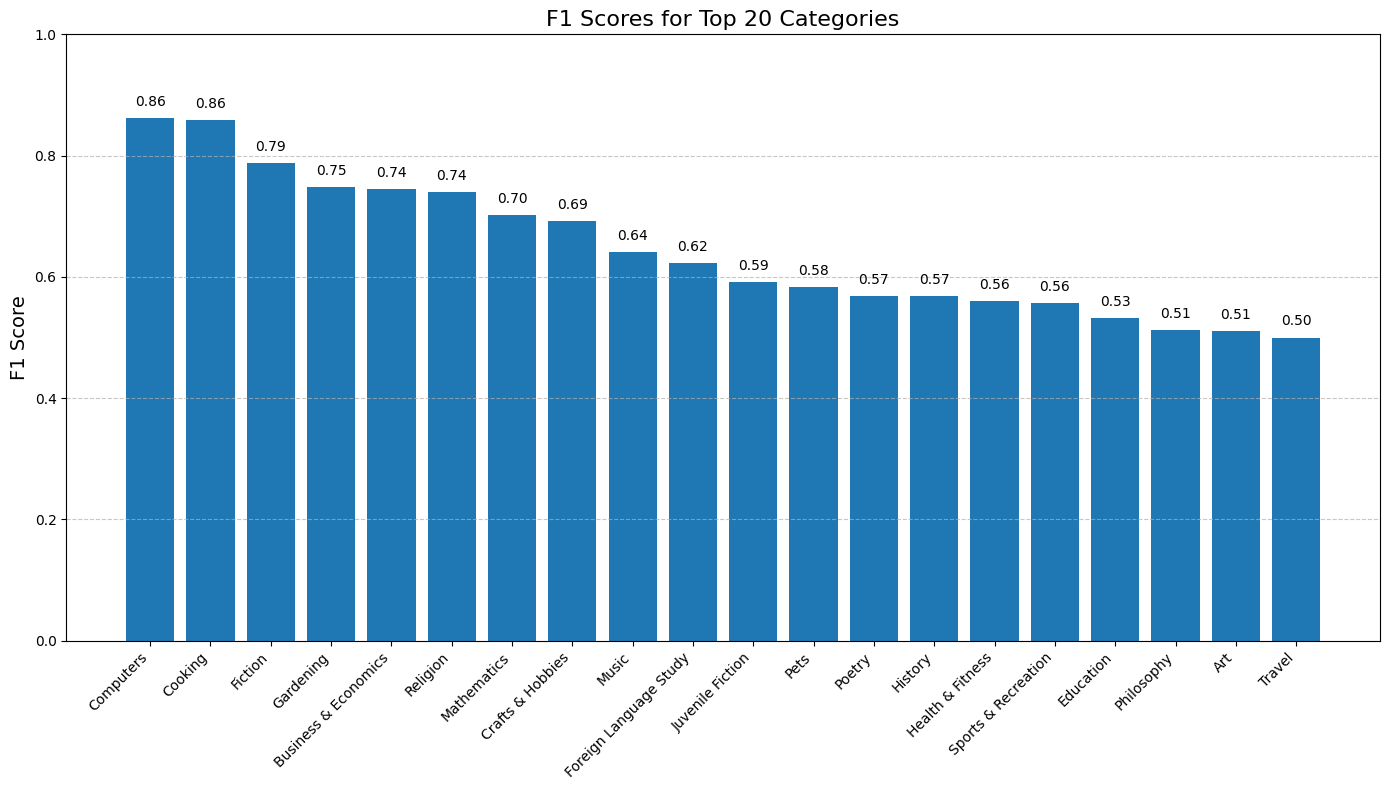

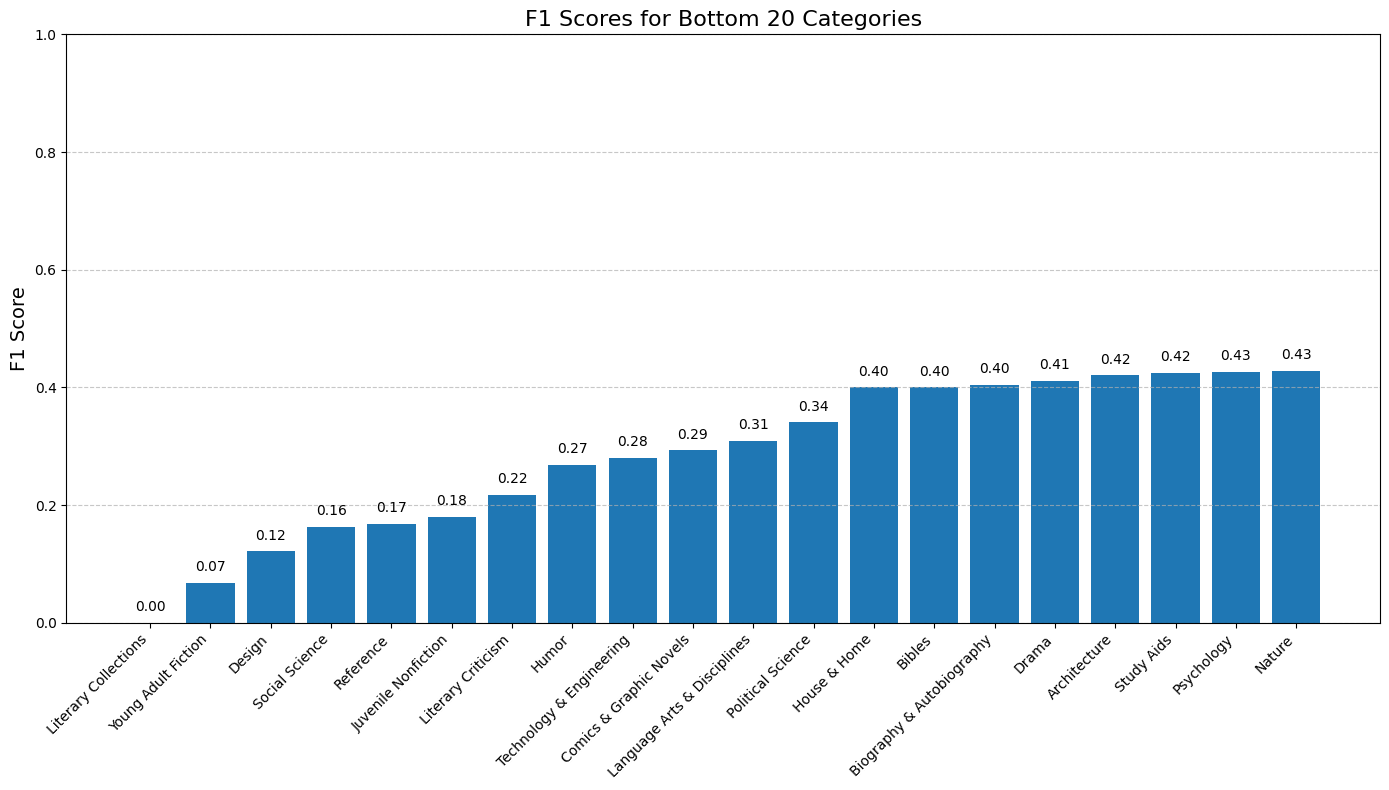

[21:12:01] Total training and evaluation time: 120.2 seconds
[21:12:02] Starting category assignment...
[21:12:02] Deduplicating books...
[21:12:02] Reduced from 323765 rows to 73276 unique books
[21:12:03] Assigning categories to 10666 unique books
[21:12:03] Starting batch processing...
[21:12:04] Batch 5/6 (76.8%) - ETA: 0.2s
[21:12:04] Batch 6/6 (96.0%) - ETA: 0.0s
[21:12:04] Unique book assignment complete in 0.8 seconds
[21:12:04] Creating book-to-category mapping...
[21:12:05] Propagating assignments to all book reviews...


<ipython-input-40-15025280da54>:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['valid_categories'] = filtered_df['categories'].apply(parse_and_check_categories)


[21:12:13] Propagation complete in 8.8 seconds
[21:12:13] Assigned categories to 40315 reviews of 10666 unique books


<ipython-input-41-dec693d714a1>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['assigned_categories'] = None


In [ ]:

# We will use the BISAC general categories list
cat_list = ['Antiques & Collectibles', 'Architecture', 'Art', 'Bibles',
       'Biography & Autobiography', 'Body, Mind & Spirit',
       'Business & Economics', 'Comics & Graphic Novels', 'Computers',
       'Cooking', 'Crafts & Hobbies', 'Design', 'Drama', 'Education',
       'Family & Relationships', 'Fiction', 'Foreign Language Study',
       'Games & Activities', 'Gardening', 'Health & Fitness', 'History',
       'House & Home', 'Humor', 'Juvenile Fiction', 'Juvenile Nonfiction',
       'Language Arts & Disciplines', 'Law', 'Literary Collections',
       'Literary Criticism', 'Mathematics', 'Medical', 'Music', 'Nature',
       'Performing Arts', 'Pets', 'Philosophy', 'Photography', 'Poetry',
       'Political Science', 'Psychology', 'Reference', 'Religion',
       'Science', 'Self-help', 'Social Science', 'Sports & Recreation',
       'Study Aids', 'Technology & Engineering', 'Transportation',
       'Travel', 'True Crime', 'Young Adult Fiction',
       'Young Adult Nonfiction']

# Train the classifier using the category list
classifier, mlb, valid_categories, performance = train_category_classifier(
    filtered_df,
    all_embeddings,
    cat_list,
    test_size=0.2
)

# Use the classifier to assign categories to books without them
assigned_series = assign_categories_supervised(
    filtered_df,
    classifier,
    mlb,
    all_embeddings,
    batch_size=2048
)

# Store results in the DataFrame
filtered_df['assigned_categories'] = None
filtered_df.loc[assigned_series.index, 'assigned_categories'] = assigned_series

Assigning values to dataframe

In [ ]:
# First, parse the existing categories for all books
def parse_categories(cat_string):
    if pd.isna(cat_string):
        return None
    try:
        if isinstance(cat_string, list):
            return cat_string
        else:
            return ast.literal_eval(cat_string)
    except:
        return None

# Initialize assigned_categories with parsed values from existing categories
filtered_df['assigned_categories'] = filtered_df['categories'].apply(parse_categories)

# Then update with our new assignments where available
filtered_df.loc[assigned_series.index, 'assigned_categories'] = assigned_series

<ipython-input-42-fcbaefd27093>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['assigned_categories'] = filtered_df['categories'].apply(parse_categories)


Remove books missing a description

In [ ]:
filtered_df = filtered_df[filtered_df['description'].notna()]

View some samples

In [ ]:
# Filter rows where 'categories' is NaN and 'assigned_categories' is not NaN
mask = (filtered_df['categories'].isna()) & (filtered_df['assigned_categories'].notna())
missing_then_imputed = filtered_df[mask].copy()

# Drop duplicate titles to ensure each book is printed only once
unique_books = missing_then_imputed.drop_duplicates(subset='title')

# Sample rows from the unique books
sample_rows = unique_books.head(75)

# Iterate over the sampled rows and print details
for idx, row in sample_rows.iterrows():
    title = row.get('title', 'N/A')
    standard_title = row.get('standard_title', 'N/A')
    description = row.get('description', 'N/A')
    assigned_cat = row.get('assigned_categories', None)

    print("==== Example Book ====")
    print(f"Title:       {title}")
    print(f"Title:       {standard_title}")
    print(f"Description: {description}")
    print(f"Assigned:    {assigned_cat}\n")


==== Example Book ====
Title:       The Alchemist: A Fable about Following Your Dream
Title:       the alchemist a fable about following your dream
Description: The Alchemist by Paulo Coelho | Book Summary | (With Bonus) Get the kindle version for Free when you purchase the paperback version Today! Do you lack the motivation and drive to pursue your dreams? Does your dream seem out of your grasp? Paul Coelho had only one dream. It was to be a writer. After many twists and turns in life and at 39 years old, Paul decided that he would leave his moneymaking career as a songwriter and pursue the dream he was set out for. The Alchemist is a best-selling book that Paul have lived. The Alchemist is an inspiring fable, a metaphoric tale by Paul Coelho that reflects his own journey and soul. It teaches us to listen to our hearts, follow our dreams and go after what we set out to be. "Don't give in to your fears. If you do, you won't be able to talk to your heart." - Paul Coelho This book is not

In [ ]:
sample = filtered_df.sample(n=10, random_state=42)
sample

,id,title,price,user_id,profile_name,review_helpfulness,review_score,review_time,review_summary,review_text,...,publish_year,standard_title,primary_author,canonical_title,title_count,normalized_popularity,parsed_categories,embedding_idx,valid_categories,assigned_categories
1017710,0727852914,This Calder Range (Calder Saga's),NaN,AVUP5QD49GLWT,"Janet ""Janet Sue Terry author of Possibilitie...",1,5.0,2005-06-15,Whisper of riches,Chase Benteen Calder was bound to wrest a fort...,...,2011,this calder range,Janet Dailey,This Calder Range (Calder Saga's),20.0,0.294963,[Fiction],206359,[Fiction],[Fiction]
1068765,B0001FZGS0,The Bride,NaN,A1OP4JV3DLZRBZ,Krista Lyn,0,5.0,2009-02-23,One of my favorites...refreshing!,"This past week, I've been revisiting ""old favo...",...,2011,the bride,Julie Garwood,The Bride,176.0,0.562359,[Fiction],77339,[Fiction],[Fiction]
502705,B000FKPB2M,"The Marino Mission: One Girl, One Mission, One...",1.29,A2EDZH51XHFA9B,"Robert P. Beveridge ""xterminal""",20,3.0,2005-05-12,Succeeds relatively well...,"Karen B. Chapman, The Marino Mission (Wiley, 2...",...,2004,"the marino mission one girl, one mission, one ...",Karen B Chapman,"The Marino Mission: One Girl, One Mission, One...",16.0,0.268455,[Study Aids],221081,[Study Aids],[Study Aids]
1301500,B000PMCF1A,The Catcher in the Rye [Audiobook] [Cd] [Unabr...,NaN,A3DPHBYVBGNNAU,Carlos Ruiz,0,5.0,2001-09-16,Great peice of American Literature,By far one of the best books I have ever read....,...,2010,the catcher in the rye,John Donovan,The Catcher in the Rye [Audiobook] [Cd] [Unabr...,2126.0,0.874249,[Young Adult Fiction],4215,[Young Adult Fiction],[Young Adult Fiction]
1213462,B000OXK8GO,Rules for Old Men Waiting,NaN,A370T7ZOJJ76I2,"fluffy, the human being.",2,4.0,2007-02-24,a sad beauty.,an emotionally powerful novel that drags the r...,...,2007,rules for old men waiting,Peter Pouncey,Rules for Old Men Waiting,41.0,0.381913,[Fiction],160751,[Fiction],[Fiction]
865776,0613707001,Everything's Eventual: 14 Dark Tales,NaN,A1HS9F7J51E9CB,sweetmolly,94,5.0,2002-03-21,Everything's Comin' Up Roses,Stephen King just gets better and better. His ...,...,2002,everythings eventual 14 dark tales,Stephen King,Everything's Eventual: 14 Dark Tales,289.0,0.624294,[Fiction],56280,[Fiction],[Fiction]
383734,B000JORMJO,Ham on Rye,NaN,AJKWF4W7QD4NS,"N. Durham ""Big Evil""",0,5.0,2007-12-31,It's a hard knock life,Charles Bukowski's Ham on Rye details the earl...,...,2009,ham on rye,Charles Bukowski,Ham on Rye,152.0,0.544081,[Fiction],85354,[Fiction],[Fiction]
1174352,B0006AKN6U,All quiet on the western front;,NaN,A1NC9AGZOBI0M1,"R. Chaffey ""beckahi""",2,5.0,2004-04-01,Disquieting,&quot;All Quiet on the Western Front&quot; tel...,...,1996,all quiet on the western front,Erich Maria Remarque,All quiet on the western front;,420.0,0.671053,[Fiction],41866,[Fiction],[Fiction]
288238,B000NOWYR0,Tender Is the Night,NaN,A294R0OL2SEFPU,book concierge,1,4.0,2011-12-20,Review of audio book,The novel tells the story of the Nicole and Di...,...,1995,tender is the night,F. Scott Fitzgerald,Tender Is the Night,492.0,0.690858,[Fiction],36394,[Fiction],[Fiction]
1002778,B0007DWZOO,The electric kool-aid acid test,NaN,A2P2TNFJFXBN6P,Michael Herman,6,5.0,2006-02-10,amazing and unique portrait of an era,"I love this book, it is an amazing story and a...",...,1999,the electric kool-aid acid test,Tom Wolfe,The Electric Kool-Aid Acid Test,282.0,0.621229,[Social Science],57149,[Social Science],[Social Science]


## SECTION 2.6: BISAC CATEGORIES

The BISAC Subject Headings are a method to classify books that is geared towards bookstores. It is mainly used by the Northern American booktrade, and online sellers like Barnes & Noble, Amazon and Baker & Taylor. The Book Industry Study Group maintains the BISAC system. We will use it here to create a top-level category and a lower-level category for each book.

First let's create the clean, simplified BISAC data or import it if we have it already

In [ ]:
import os
import pandas as pd

def load_bisac_two_level(csv_path, pkl_path=None, force_reload=False):
    """
    Loads BISAC data from csv_path and transforms it into a two-level hierarchy:
    'bisac_general' and 'bisac_specific'. Caches/loads the result from a pickle
    if pkl_path is given and force_reload=False (and the file exists).
    """
    if pkl_path is None:
        # Derive a default .pkl path from the CSV path
        pkl_path = csv_path.rsplit('.', 1)[0] + '.pkl'

    # Attempt to load from pickle if it exists and not forcing a reload
    if not force_reload and os.path.exists(pkl_path):
        try:
            print(f"Loading cached BISAC data from {pkl_path}")
            return pd.read_pickle(pkl_path)
        except Exception as e:
            print(f"Error loading pickle file: {e}")
            print("Falling back to CSV loading.")

    print(f"Loading BISAC data from {csv_path}")

    # Read the CSV
    bisac_df = pd.read_csv(csv_path,
                           header=0,                     # row 1 is column names
                           usecols=["Description"],      # just load "Description" column
                           dtype=str                     )

    # Convert NaNs / non-string to empty string
    bisac_df["Description"] = bisac_df["Description"].fillna("").astype(str)

    # Split each category on " / "
    split_cols = bisac_df["Description"].str.split(" / ")

    # Extract the first two levels, ignoring deeper parts
    bisac_df["bisac_general"] = split_cols.apply(lambda parts: parts[0] if len(parts) > 0 else None)
    bisac_df["bisac_specific"] = split_cols.apply(lambda parts: parts[1] if len(parts) > 1 else None)

    # Keep unique two-level combinations
    bisac_unique = bisac_df[["bisac_general", "bisac_specific"]].drop_duplicates()
    bisac_unique = bisac_unique.sort_values(["bisac_general", "bisac_specific"])

    # Cache to pickle
    bisac_unique.to_pickle(pkl_path)
    print(f"Saved processed BISAC two-level data to {pkl_path}")

    return bisac_unique


In [ ]:
bisac_df = load_bisac_two_level(csv_path="bisac.csv", pkl_path="bisac_two_level.pkl", force_reload=True)


Loading BISAC data from bisac.csv
Saved processed BISAC two-level data to bisac_two_level.pkl


In [ ]:
num_unique = bisac_df['bisac_general'].nunique()
print(f"Number of unique values in 'bisac_general': {num_unique}")


Number of unique values in 'bisac_general': 53


In [ ]:
unique_values = bisac_df['bisac_general'].unique()
unique_values

array(['Antiques & Collectibles', 'Architecture', 'Art', 'Bibles',
       'Biography & Autobiography', 'Body, Mind & Spirit',
       'Business & Economics', 'Comics & Graphic Novels', 'Computers',
       'Cooking', 'Crafts & Hobbies', 'Design', 'Drama', 'Education',
       'Family & Relationships', 'Fiction', 'Foreign Language Study',
       'Games & Activities', 'Gardening', 'Health & Fitness', 'History',
       'House & Home', 'Humor', 'Juvenile Fiction', 'Juvenile Nonfiction',
       'Language Arts & Disciplines', 'Law', 'Literary Collections',
       'Literary Criticism', 'Mathematics', 'Medical', 'Music', 'Nature',
       'Performing Arts', 'Pets', 'Philosophy', 'Photography', 'Poetry',
       'Political Science', 'Psychology', 'Reference', 'Religion',
       'Science', 'Self-help', 'Social Science', 'Sports & Recreation',
       'Study Aids', 'Technology & Engineering', 'Transportation',
       'Travel', 'True Crime', 'Young Adult Fiction',
       'Young Adult Nonfiction'], dtype

In [ ]:
# Print all unique values of BISAC general
unique_values = bisac_df['bisac_general'].unique()
print("\nList of all unique values:")
for value in sorted(unique_values):
    print(f"- {value}")


List of all unique values:
- Antiques & Collectibles
- Architecture
- Art
- Bibles
- Biography & Autobiography
- Body, Mind & Spirit
- Business & Economics
- Comics & Graphic Novels
- Computers
- Cooking
- Crafts & Hobbies
- Design
- Drama
- Education
- Family & Relationships
- Fiction
- Foreign Language Study
- Games & Activities
- Gardening
- Health & Fitness
- History
- House & Home
- Humor
- Juvenile Fiction
- Juvenile Nonfiction
- Language Arts & Disciplines
- Law
- Literary Collections
- Literary Criticism
- Mathematics
- Medical
- Music
- Nature
- Performing Arts
- Pets
- Philosophy
- Photography
- Poetry
- Political Science
- Psychology
- Reference
- Religion
- Science
- Self-help
- Social Science
- Sports & Recreation
- Study Aids
- Technology & Engineering
- Transportation
- Travel
- True Crime
- Young Adult Fiction
- Young Adult Nonfiction


In [ ]:
bisac_df.shape

(2139, 2)

In [ ]:
bisac_df.head()

,bisac_general,bisac_specific
1,Antiques & Collectibles,Advertising
2,Antiques & Collectibles,Americana
3,Antiques & Collectibles,Art
4,Antiques & Collectibles,Autographs
5,Antiques & Collectibles,Books


In [ ]:

def build_bisac_embeddings(
    bisac_df,
    model_name_or_path='all-MiniLM-L6-v2',
    device='cuda'
):
    """
    1) Takes a DataFrame with columns 'bisac_general' and 'bisac_specific'.
    2) Builds embeddings for each unique general category.
    3) Builds embeddings for each (general -> specific) subcategory.

    Returns:
        - general_embeddings: dict[str, np.ndarray]
            A mapping from 'bisac_general' -> embedding vector
        - specific_embeddings: dict[str, dict[str, np.ndarray]]
            A nested dict: specific_embeddings[general_category][specific_label] -> embedding vector
    """

    # -------------------------------------------------------------------------
    # PREPARE THE BISAC DATAFRAME
    # -------------------------------------------------------------------------
    bisac_df = bisac_df.dropna(subset=['bisac_general'])
    bisac_df['bisac_specific'] = bisac_df['bisac_specific'].fillna("")

    # Grab unique general categories
    unique_generals = bisac_df['bisac_general'].unique()

    # -------------------------------------------------------------------------
    # INITIALIZE THE EMBEDDING MODEL
    # -------------------------------------------------------------------------
    model = SentenceTransformer(model_name_or_path, device=device)

    # -------------------------------------------------------------------------
    # CREATE EMBEDDINGS FOR GENERAL CATEGORIES
    # -------------------------------------------------------------------------
    general_embeddings = {}
    for general_cat in unique_generals:
        vec = model.encode(general_cat, convert_to_numpy=True)
        general_embeddings[general_cat] = vec

    # -------------------------------------------------------------------------
    # CREATE EMBEDDINGS FOR SPECIFIC SUBCATEGORIES (PER-GENERAL CATEGORY)
    # -------------------------------------------------------------------------
    specific_embeddings = {}
    for general_cat in unique_generals:
        sub_df = bisac_df[bisac_df['bisac_general'] == general_cat]
        specifics = sub_df['bisac_specific'].unique()

        sub_dict = {}
        for spec in specifics:
            if spec.strip() == "":
                continue
            vec = model.encode(spec, convert_to_numpy=True)
            sub_dict[spec] = vec

        specific_embeddings[general_cat] = sub_dict

    return general_embeddings, specific_embeddings


In [ ]:

gen_embeds, spec_embeds = build_bisac_embeddings(
    bisac_df,
    model_name_or_path='all-MiniLM-L6-v2',
    device='cuda'
)

print("Number of general categories:", len(gen_embeds))
some_general = list(gen_embeds.keys())[0]
print("Example general category:", some_general)
print("Embedding shape:", gen_embeds[some_general].shape)

print("\nNumber of specific subcategories for that general cat:",
      len(spec_embeds[some_general]))


Number of general categories: 53
Example general category: Antiques & Collectibles
Embedding shape: (384,)

Number of specific subcategories for that general cat: 44


Now create embeddings for books based on assigned category and the description

In [ ]:
def build_combined_text(row, cat_col='assigned_categories', desc_col='description', title_col='standard_title'):
    """
    Given a row of your DataFrame, prepend title and category info to the description.
    Example output:
      "TITLE: Book Title\nCATEGORIES: Fiction, Romance\nDESCRIPTION: A long textual description..."
    """
    # Extract the title (or empty string if missing)
    title_str = row.get(title_col, "")
    if pd.isna(title_str):
        title_str = ""

    # Extract the list of categories
    categories = row.get(cat_col, [])

    # Check if categories is empty or None - fixed to properly handle lists
    if categories is None or len(categories) == 0 or (isinstance(categories, (list, np.ndarray)) and pd.isna(categories).all()):
        cat_str = "None"
    else:
        cat_str = ", ".join(categories)

    # Extract the description (or empty string if missing)
    desc_str = row.get(desc_col, "")
    if pd.isna(desc_str):
        desc_str = ""

    # Combine them in a single string
    combined_text = f"TITLE: {title_str}\nCATEGORIES: {cat_str}\nDESCRIPTION: {desc_str}"
    return combined_text


In [ ]:
def embed_books_with_categories(df, model, cat_col='assigned_categories', desc_col='description', title_col='standard_title', batch_size=2048):
    """
    For each row in 'df', build a combined text of the form:
      "TITLE: <title>\nCATEGORIES: <cat1>, <cat2>...\nDESCRIPTION: <description>"
    Then encode it with the provided SentenceTransformer 'model'.

    Returns:
        embeddings: np.ndarray of shape (num_rows, embedding_dim)
    """
    print('Combining texts....')

    # Build all combined texts
    combined_texts = [
        build_combined_text(row, cat_col=cat_col, desc_col=desc_col, title_col=title_col)
        for _, row in df.iterrows()
    ]
    print('Texts combined!')

    # Encode in batches
    embeddings = model.encode(
        combined_texts,
        batch_size=batch_size,
        show_progress_bar=True,
        convert_to_numpy=True
    )
    return embeddings

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from tqdm.auto import tqdm
import time

def two_pass_bisac_classification(
    df,
    embeddings,
    general_embeddings,
    specific_embeddings,
    top_general_threshold=None,
    top_specific_threshold=None,
    batch_size=1000
):
    """
    Two-pass BISAC classification, with an override if 'assigned_categories'
    intersects with the known BISAC general categories.

    df must have:
      - 'assigned_categories': a list of strings (possibly empty),
      - (optionally) 'description' or other columns if you used them to build embeddings.

    After step 1 determines the best_general, we override that with any
    user-assigned category that matches the known BISAC generals.

    Returns
    -------
    df : pd.DataFrame
        The original DataFrame with columns:
         - 'genre_general'
         - 'best_general_score'
         - 'genre_specific'
         - 'best_specific_score'
    """
    start_time = time.time()
    print(f"Starting classification for {len(df)} books...")

    # --------------------------#
    # FIND BEST GENERAL CAT     #
    # --------------------------#
    print("Step 1: Finding best general categories...")
    all_generals = list(general_embeddings.keys())
    gen_matrix = np.stack([general_embeddings[g] for g in all_generals], axis=0)

    # (num_books x num_generals)
    cos_sims_general = cosine_similarity(embeddings, gen_matrix)

    # Single best match for each book
    best_general_indices = np.argmax(cos_sims_general, axis=1)
    best_general_scores = np.max(cos_sims_general, axis=1)

    df['genre_general'] = [all_generals[idx] for idx in best_general_indices]
    df['best_general_score'] = best_general_scores

    general_time = time.time()
    print(f"General categories assigned in {general_time - start_time:.2f} seconds")

    # -----------------------------#
    # OVERRIDE WITH USER INFO      #
    # -----------------------------#
    # If the row's assigned_categories includes a known BISAC general,
    # override the automatically computed best_general.
    valid_generals_set = set(all_generals)

    for i, row in df.iterrows():
        assigned_cats = row.get('assigned_categories', [])
        if not isinstance(assigned_cats, list):
            continue  # if it's not a list, skip
        intersection = valid_generals_set.intersection(assigned_cats)
        if len(intersection) > 0:
            # override with the first matching general
            chosen_general = list(intersection)[0]
            df.at[i, 'genre_general'] = chosen_general
            # Set an arbitrary high confidence for override
            df.at[i, 'best_general_score'] = 1.0

    override_time = time.time()
    print(f"Override step done in {override_time - general_time:.2f} seconds")

    # -------------------------------#
    # FIND BEST SPECIFIC CATEGORY    #
    # -------------------------------#
    print("Step 2: Finding best specific categories...")
    best_specifics = [None] * len(df)
    best_spec_scores = [None] * len(df)

    # Group books by their final assigned general category
    general_to_indices = {}
    for i, general_cat in enumerate(df['genre_general']):
        if general_cat not in general_to_indices:
            general_to_indices[general_cat] = []
        general_to_indices[general_cat].append(i)

    for general_cat, indices in tqdm(general_to_indices.items(), desc="Processing general categories"):
        # sub_dict: dictionary of specific -> embedding for this general cat
        sub_dict = specific_embeddings.get(general_cat, {})
        if not sub_dict:
            # no subcategories
            continue

        spec_labels = list(sub_dict.keys())
        spec_matrix = np.stack([sub_dict[s] for s in spec_labels], axis=0)

        # Process books in batches
        for start_idx in range(0, len(indices), batch_size):
            batch_indices = indices[start_idx:start_idx + batch_size]
            batch_embeddings = embeddings[batch_indices]

            # (batch_size x num_specifics)
            batch_sims = cosine_similarity(batch_embeddings, spec_matrix)

            # Find best subcat for each book in the batch
            for j, sims_row in enumerate(batch_sims):
                df_idx = batch_indices[j]
                best_spec_idx = np.argmax(sims_row)
                best_spec_score = sims_row[best_spec_idx]

                if top_specific_threshold is not None and best_spec_score < top_specific_threshold:
                    continue
                best_specifics[df_idx] = spec_labels[best_spec_idx]
                best_spec_scores[df_idx] = best_spec_score

    df['genre_specific'] = best_specifics
    df['best_specific_score'] = best_spec_scores

    end_time = time.time()
    print(f"Classification complete! Total time: {end_time - start_time:.2f} seconds")
    print(f"- General categories: {general_time - start_time:.2f} seconds")
    print(f"- Override step: {override_time - general_time:.2f} seconds")
    print(f"- Specific categories: {end_time - override_time:.2f} seconds")

    assigned_general = df['genre_general'].notna().sum()
    assigned_specific = df['genre_specific'].notna().sum()
    print(f"Assigned general categories: {assigned_general}/{len(df)} ({assigned_general/len(df)*100:.1f}%)")
    print(f"Assigned specific categories: {assigned_specific}/{len(df)} ({assigned_specific/len(df)*100:.1f}%)")

    return df


In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2', device='cuda')

filtered_df = filtered_df.reset_index(drop=True)

In [ ]:
import ast

# Convert the string representations of lists to actual Python lists
filtered_df["assigned_categories"] = filtered_df["assigned_categories"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') and x.endswith(']') else x
)

In [ ]:
embeddings = embed_books_with_categories(
    filtered_df,
    model=model,
    cat_col='assigned_categories',
    desc_col='description',
    title_col='standard_title',
    batch_size=2048
)


Combining texts....
Texts combined!


Batches:   0%|          | 0/157 [00:00<?, ?it/s]

In [ ]:
print(embeddings.shape)
print(filtered_df.shape)

(321301, 384)
(321301, 29)


In [ ]:
# Before calling two_pass_bisac_classification:
filtered_df = filtered_df.reset_index(drop=True)


In [ ]:
final_df = two_pass_bisac_classification(
    filtered_df,
    embeddings,
    gen_embeds,
    spec_embeds,
    top_general_threshold=None,
    top_specific_threshold=None
)


Starting classification for 321301 books...
Step 1: Finding best general categories...
General categories assigned in 0.57 seconds
Override step done in 25.90 seconds
Step 2: Finding best specific categories...


Processing general categories:   0%|          | 0/52 [00:00<?, ?it/s]

Classification complete! Total time: 29.11 seconds
- General categories: 0.57 seconds
- Override step: 25.90 seconds
- Specific categories: 2.63 seconds
Assigned general categories: 321301/321301 (100.0%)
Assigned specific categories: 321301/321301 (100.0%)


Creating a combined field

In [ ]:
final_df['genre_combined'] = final_df.apply(
    lambda row: (str(row['genre_general']) + ' / ' + str(row['genre_specific']))
    if pd.notna(row['genre_general']) and pd.notna(row['genre_specific'])
    else (str(row['genre_general']) if pd.notna(row['genre_general']) else
         (str(row['genre_specific']) if pd.notna(row['genre_specific']) else '')),
    axis=1
)

In [ ]:
# Get unique titles only (first occurrence of each title)
unique_titles_df = final_df.drop_duplicates(subset=['title'])

unique_titles_df = unique_titles_df[['title', 'authors', 'description', 'categories', 'assigned_categories', 'genre_combined',
                                   'genre_general', 'genre_specific']]

# Display 50 random unique titles
unique_titles_df.sample(50)

,title,authors,description,categories,assigned_categories,genre_combined,genre_general,genre_specific
34278,Middlemarch a Study of Provincial Life,['George Eliot'],“Middlemarch - A Study of Provincial Life” is ...,['Fiction'],[Fiction],Fiction / World Literature,Fiction,World Literature
288772,Kitchen Table Goldmine: How To Make Over $1000...,"['Lance A. Murkin', 'Roger Mason']",An amazingly simple method of generating a hom...,['Business & Economics'],[Business & Economics],Business & Economics / Home-Based Businesses,Business & Economics,Home-Based Businesses
304549,"Hen, a Chick, and a String Guitar",['Margaret Read MacDonald'],A cumulative tale from Chile that begins with ...,['Juvenile Fiction'],[Juvenile Fiction],Juvenile Fiction / Nursery Rhymes,Juvenile Fiction,Nursery Rhymes
236169,A Coach's Life: My Forty Years in College Bask...,"['Dean Smith', 'John Kilgo', 'Sally Jenkins']",Legendary University of North Carolina basketb...,['Biography & Autobiography'],[Biography & Autobiography],Biography & Autobiography / Sports,Biography & Autobiography,Sports
273856,In tune with the world;: A theory of festivity,['Josef Pieper'],"In this stimulating and still-timely study, Jo...",['Philosophy'],[Philosophy],Philosophy / Hermeneutics,Philosophy,Hermeneutics
169331,"Confessions of a Record Producer, 2 Ed: How to...",['Moses Avalon'],"(Book). Now completely updated and revised, th...",['Music'],[Music],Music / Printed Music,Music,Printed Music
261728,The House Without a Key (Charlie Chan Mystery),['Earl Derr Biggers'],The House Without a Key Earl Derr Biggers The ...,NaN,[Fiction],Fiction / Mystery & Detective,Fiction,Mystery & Detective
317480,Japan's Reluctant Realism: Foreign Policy Chal...,['M. Green'],"In Japan's Reluctant Realism , Michael J. Gree...",['Social Science'],[Social Science],Social Science / Developing & Emerging Countries,Social Science,Developing & Emerging Countries
145571,"MASTERING THE ART OF FRENCH COOKING, volume 2 ...",['Julia Child'],"Anyone can cook in the French manner anywhere,...",['Cooking'],[Cooking],Cooking / Cooking for Kids,Cooking,Cooking for Kids
181955,In the Country of the Young,['Brett Young'],Country music phenom Brett Young's touching si...,['Juvenile Nonfiction'],[Juvenile Nonfiction],"Juvenile Nonfiction / Toys, Dolls & Puppets",Juvenile Nonfiction,"Toys, Dolls & Puppets"


In [ ]:
final_df.columns

Index(['id', 'title', 'price', 'user_id', 'profile_name', 'review_helpfulness',
       'review_score', 'review_time', 'review_summary', 'review_text',
       'description', 'authors', 'image', 'preview_link', 'publisher',
       'published_date', 'info_link', 'categories', 'ratings_count',
       'publish_year', 'standard_title', 'primary_author', 'canonical_title',
       'title_count', 'normalized_popularity', 'parsed_categories',
       'embedding_idx', 'valid_categories', 'assigned_categories',
       'genre_general', 'best_general_score', 'genre_specific',
       'best_specific_score', 'genre_combined'],
      dtype='object')

In [ ]:
final_df.shape

(321301, 34)

In [ ]:
def consolidate_genres(df, n=50):
    """
    Consolidate genres in a dataframe to reduce sparsity

    Parameters:
    -----------
    df : pandas DataFrame
        Dataframe containing book review data with genre_combined, genre_general columns
    n : int, default=50
        Number of top genre_combined values to keep

    Returns:
    --------
    pandas DataFrame
        Original dataframe with a new 'genre_consolidated' column
    """
    # Make a copy of the dataframe to avoid modifying the original
    result_df = df.copy()

    # Get the top n most common genre_combined values
    top_genres = df['genre_combined'].value_counts().head(n).index.tolist()

    # Create the new genre_consolidated column
    def assign_genre(row):
        if row['genre_combined'] in top_genres:
            return row['genre_combined']
        else:
            return f"{row['genre_general']} / General"

    # Apply the function to create the new column
    result_df['genre_consolidated'] = result_df.apply(assign_genre, axis=1)

    return result_df

In [ ]:
# Assuming df is your original dataframe
final_df = consolidate_genres(final_df, n=50)

# To see how many unique genres you now have
print(f"Original unique combined genres: {final_df['genre_combined'].nunique()}")
print(f"Consolidated unique genres: {final_df['genre_consolidated'].nunique()}")

# To see the distribution of the consolidated genres
print(final_df['genre_consolidated'].value_counts().head(20))

Original unique combined genres: 1726
Consolidated unique genres: 102
genre_consolidated
Fiction / World Literature                                32212
Fiction / Mystery & Detective                             18430
Fiction / Literary                                        14741
Religion / General                                        11058
Fiction / Thrillers                                       10589
Fiction / General                                         10422
Business & Economics / General                            10347
Biography & Autobiography / Personal Memoirs              10258
Juvenile Fiction / General                                10148
Fiction / Sea Stories                                      7650
Biography & Autobiography / General                        7431
Fiction / Science Fiction                                  7064
Fiction / Fairy Tales, Folk Tales, Legends & Mythology     6898
History / General                                          5813
Fiction / Roman

## SECTION 2.7: FINAL DATA CLEANING -- TEXT DESCRIPTIONS, DROPPING COLUMNS, ETC.

In [ ]:
def analyze_null_values(df, dataset_name="Dataset"):
    """
    Analyze and display null values in each column of a dataframe.

    Args:
        df (pd.DataFrame): Input dataframe
        dataset_name (str): Name of dataset for display purposes

    Returns:
        pd.Series: Percentage of null values per column
    """

    null_percentages = (df.isnull().sum() / len(df) * 100).round(2)

    null_summary = pd.DataFrame({
        'Column': null_percentages.index,
        'Null Count': df.isnull().sum(),
        'Null %': null_percentages,
        'Data Type': df.dtypes
    })

    null_summary = null_summary.sort_values('Null %', ascending=False)

    print(f"\n{dataset_name} Null Value Analysis:")
    print("-" * 80)
    print(null_summary)
    print("-" * 80)
    print(f"Total rows in dataset: {len(df):,}")

    return null_summary


In [ ]:
filtered_nulls = analyze_null_values(final_df, "Reviews")


Reviews Null Value Analysis:
--------------------------------------------------------------------------------
                                      Column  Null Count  Null % Data Type
price                                  price      262884   81.82   float64
ratings_count                  ratings_count      106461   33.13   float64
publisher                          publisher       23810    7.41    object
categories                        categories        9807    3.05    object
image                                  image        8980    2.79    object
publish_year                    publish_year         842    0.26     Int64
published_date                published_date         575    0.18    object
title                                  title           0    0.00    object
id                                        id           0    0.00    object
review_helpfulness        review_helpfulness           0    0.00    object
user_id                              user_id           0    0.00

In [ ]:
num_unique_users = final_df["user_id"].nunique()
print("Number of unique user IDs:", num_unique_users)

Number of unique user IDs: 15839


Cleaning up text descriptions

In [ ]:
def fix_text_encoding(text, verbose=True):
    """
    Corrects common encoding issues in text, including apostrophes,
    quotation marks, trademark symbols, and other special characters.

    Parameters:
    -----------
    text : str
        The text containing incorrectly encoded characters
    verbose : bool, default=True
        Whether to print the count of changes made

    Returns:
    --------
    str
        Text with corrected encoding
    """
    if not isinstance(text, str):
        return text

    # Dictionary of common encoding issues and their replacements
    replacements = {
        '‚Äô': "'",     # Apostrophe
        '‚Äù': '"',     # Right double quote
        '‚Ä¢': '•',     # Bullet point
        '‚Äú': '"',     # Left double quote
        '‚Ä': '',       # Part of some incorrect sequences
        '¬Æ': '®',      # Registered trademark
        '‚Äî': '—',     # Em dash
        '‚Äì': '–',     # En dash
        '\u201c': '"',  # Left double quote (Unicode)
        '\u201d': '"',  # Right double quote (Unicode)
        '\u2018': "'",  # Left single quote (Unicode)
        '\u2019': "'",  # Right single quote/apostrophe (Unicode)
        '\u2022': '•',  # Bullet point (Unicode)
        '\u2026': '...', # Ellipsis (Unicode)
        '\u00a0': ' ',  # Non-breaking space
        '\u2013': '–',  # En dash (Unicode)
        '\u2014': '—',  # Em dash (Unicode)
        '\u00ae': '®',  # Registered trademark (Unicode)
        '\u00a9': '©',  # Copyright symbol (Unicode)
        '\u00b0': '°',  # Degree symbol (Unicode)
        '\u2122': '™',  # Trademark symbol (Unicode)
        '\u00a3': '£',  # Pound symbol (Unicode)
        '\u00a5': '¥',  # Yen symbol (Unicode)
        '\u20ac': '€',  # Euro symbol (Unicode)
    }

    # Track changes
    total_changes = 0
    change_details = {}

    # Replace each problematic encoding
    for bad, good in replacements.items():
        # Count occurrences before replacement
        count = text.count(bad)
        if count > 0:
            text = text.replace(bad, good)
            total_changes += count
            change_details[f"{bad} → {good}"] = count

    # Clean up any double spaces that might have been created
    original_len = len(text)
    text = ' '.join(text.split())
    space_changes = original_len - len(text)

    # Print summary if verbose
    if verbose and total_changes > 0:
        print(f"Total encoding issues fixed: {total_changes}")
        for change, count in change_details.items():
            print(f"  {change}: {count} occurrences")
        if space_changes > 0:
            print(f"  Whitespace normalization: removed {space_changes} extra spaces")

    return text

In [ ]:
final_df['review_text'] = final_df['review_text'].apply(fix_text_encoding)

In [ ]:
final_df['description'] = final_df['description'].apply(fix_text_encoding)

Streaming output truncated to the last 5000 lines.
  ’ → ': 3 occurrences
Total encoding issues fixed: 4
  ’ → ': 4 occurrences
Total encoding issues fixed: 1
  – → –: 1 occurrences
Total encoding issues fixed: 2
  — → —: 2 occurrences
Total encoding issues fixed: 2
  — → —: 2 occurrences
Total encoding issues fixed: 4
  … → ...: 3 occurrences
  — → —: 1 occurrences
Total encoding issues fixed: 24
  “ → ": 7 occurrences
  ” → ": 7 occurrences
  ’ → ': 3 occurrences
  — → —: 7 occurrences
Total encoding issues fixed: 7
  “ → ": 2 occurrences
  ” → ": 2 occurrences
  ’ → ': 1 occurrences
  — → —: 2 occurrences
Total encoding issues fixed: 7
  “ → ": 2 occurrences
  ” → ": 2 occurrences
  ’ → ': 1 occurrences
  — → —: 2 occurrences
Total encoding issues fixed: 2
  ‘ → ': 1 occurrences
  ’ → ': 1 occurrences
Total encoding issues fixed: 4
  – → –: 4 occurrences
Total encoding issues fixed: 3
  ’ → ': 1 occurrences
  — → —: 2 occurrences
Total encoding issues fixed: 1
  • → •: 1 occurrences

Dropping columns we don't need

In [ ]:
drop_columns = ['authors','title','standard_title','title_count','assigned_categories','price','ratings_count','publisher','categories','image','published_date','id','info_link','profile_name','embedding_idx', 'best_general_score', 'valid_categories', 'best_specific_score','parsed_categories']


final_df = final_df.drop(columns=drop_columns)


In [ ]:
final_df.rename(columns={
    'canonical_title': 'title',
    'primary_author': 'author'
}, inplace=True)

In [ ]:
final_df.columns

Index(['user_id', 'review_helpfulness', 'review_score', 'review_time',
       'review_summary', 'review_text', 'description', 'preview_link',
       'publish_year', 'author', 'title', 'normalized_popularity',
       'genre_general', 'genre_specific', 'genre_combined',
       'genre_consolidated', 'book_id'],
      dtype='object')

In [ ]:
final_df['author_title_key'] = final_df['author'] + '___' + final_df['title']

final_df['book_id'] = pd.factorize(final_df['author_title_key'])[0]

final_df = final_df.drop('author_title_key', axis=1)

In [ ]:
final_df.head()

,user_id,review_helpfulness,review_score,review_time,review_summary,review_text,description,preview_link,publish_year,author,title,normalized_popularity,genre_general,genre_specific,genre_combined,book_id
0,A1SMFD252FTJP9,4,5.0,2005-06-06,Cause and effect,Someone below complained that only English tea...,Jane Eyre (1847) has enjoyed huge popularity s...,http://books.google.nl/books?id=MsRAAQAAIAAJ&q...,1991,Charlotte Brontë,Jane Eyre (Everyman's Classics),1.0,Fiction,Mystery & Detective,Fiction / Mystery & Detective,0
1,A3VVDE8I22IAJA,4,5.0,2004-07-30,Upon re-reading,"Odd, how re-reading a classic can become a mea...",Jane Eyre (1847) has enjoyed huge popularity s...,http://books.google.nl/books?id=MsRAAQAAIAAJ&q...,1991,Charlotte Brontë,Jane Eyre (Everyman's Classics),1.0,Fiction,Mystery & Detective,Fiction / Mystery & Detective,0
2,ABTUNH7645QJL,25,5.0,2005-01-30,Plainly the best,"The title character of this novel is unusual, ...",Jane Eyre (1847) has enjoyed huge popularity s...,http://books.google.nl/books?id=MsRAAQAAIAAJ&q...,1991,Charlotte Brontë,Jane Eyre (Everyman's Classics),1.0,Fiction,Mystery & Detective,Fiction / Mystery & Detective,0
3,A1EKTLUL24HDG8,13,5.0,2004-01-20,Epitomizes its genre,"More than a simple love story, a gothic romanc...",Jane Eyre (1847) has enjoyed huge popularity s...,http://books.google.nl/books?id=MsRAAQAAIAAJ&q...,1991,Charlotte Brontë,Jane Eyre (Everyman's Classics),1.0,Fiction,Mystery & Detective,Fiction / Mystery & Detective,0
4,A1288XI5LO0J76,10,4.0,2004-03-31,Jane Eyre,"Jane Eyre, by Charlotte Bronte, is an enticing...",Jane Eyre (1847) has enjoyed huge popularity s...,http://books.google.nl/books?id=MsRAAQAAIAAJ&q...,1991,Charlotte Brontë,Jane Eyre (Everyman's Classics),1.0,Fiction,Mystery & Detective,Fiction / Mystery & Detective,0


In [ ]:
final_df.columns

Index(['user_id', 'review_helpfulness', 'review_score', 'review_time',
       'review_summary', 'review_text', 'description', 'preview_link',
       'publish_year', 'author', 'title', 'normalized_popularity',
       'genre_general', 'genre_specific', 'genre_combined', 'book_id'],
      dtype='object')

Re-ordering columns

In [ ]:
new_col_order = [

    # Identifiers
    'user_id',
    'book_id',

    # Book information
    'title',
    'author',
    'publish_year',
    'description',
    'preview_link',
    'normalized_popularity',

    # Category/genre information
    'genre_general',
    'genre_specific',
    'genre_combined',
    'genre_consolidated',

    # Review information
    'review_helpfulness',
    'review_score',
    'review_time',
    'review_summary',
    'review_text'
]

# Reindex
final_df = final_df.reindex(columns=new_col_order)

Looking at the final dataframe

In [ ]:
final_df.head(50)

,user_id,book_id,title,author,publish_year,description,preview_link,normalized_popularity,genre_general,genre_specific,genre_combined,genre_consolidated,review_helpfulness,review_score,review_time,review_summary,review_text
0,A1SMFD252FTJP9,0,Jane Eyre (Everyman's Classics),Charlotte Brontë,1991,Jane Eyre (1847) has enjoyed huge popularity s...,http://books.google.nl/books?id=MsRAAQAAIAAJ&q...,1.0,Fiction,Mystery & Detective,Fiction / Mystery & Detective,Fiction / Mystery & Detective,4,5.0,2005-06-06,Cause and effect,Someone below complained that only English tea...
1,A3VVDE8I22IAJA,0,Jane Eyre (Everyman's Classics),Charlotte Brontë,1991,Jane Eyre (1847) has enjoyed huge popularity s...,http://books.google.nl/books?id=MsRAAQAAIAAJ&q...,1.0,Fiction,Mystery & Detective,Fiction / Mystery & Detective,Fiction / Mystery & Detective,4,5.0,2004-07-30,Upon re-reading,"Odd, how re-reading a classic can become a mea..."
2,ABTUNH7645QJL,0,Jane Eyre (Everyman's Classics),Charlotte Brontë,1991,Jane Eyre (1847) has enjoyed huge popularity s...,http://books.google.nl/books?id=MsRAAQAAIAAJ&q...,1.0,Fiction,Mystery & Detective,Fiction / Mystery & Detective,Fiction / Mystery & Detective,25,5.0,2005-01-30,Plainly the best,"The title character of this novel is unusual, ..."
3,A1EKTLUL24HDG8,0,Jane Eyre (Everyman's Classics),Charlotte Brontë,1991,Jane Eyre (1847) has enjoyed huge popularity s...,http://books.google.nl/books?id=MsRAAQAAIAAJ&q...,1.0,Fiction,Mystery & Detective,Fiction / Mystery & Detective,Fiction / Mystery & Detective,13,5.0,2004-01-20,Epitomizes its genre,"More than a simple love story, a gothic romanc..."
4,A1288XI5LO0J76,0,Jane Eyre (Everyman's Classics),Charlotte Brontë,1991,Jane Eyre (1847) has enjoyed huge popularity s...,http://books.google.nl/books?id=MsRAAQAAIAAJ&q...,1.0,Fiction,Mystery & Detective,Fiction / Mystery & Detective,Fiction / Mystery & Detective,10,4.0,2004-03-31,Jane Eyre,"Jane Eyre, by Charlotte Bronte, is an enticing..."
5,AVT9CJLKRE0VI,0,Jane Eyre (Everyman's Classics),Charlotte Brontë,1991,Jane Eyre (1847) has enjoyed huge popularity s...,http://books.google.nl/books?id=MsRAAQAAIAAJ&q...,1.0,Fiction,Mystery & Detective,Fiction / Mystery & Detective,Fiction / Mystery & Detective,1,4.0,2012-02-20,Resurgam,Whew...I finally finished! I have been holding...
6,A1RECBDKHVOJMW,0,Jane Eyre (Everyman's Classics),Charlotte Brontë,1991,Jane Eyre (1847) has enjoyed huge popularity s...,http://books.google.nl/books?id=MsRAAQAAIAAJ&q...,1.0,Fiction,Mystery & Detective,Fiction / Mystery & Detective,Fiction / Mystery & Detective,11,5.0,2006-03-01,A Beloved Classic & Remarkable Literary Work -...,"Charlotte Bronte's ""Jane Eyre"" has been one of..."
7,A3D7L0R1281COX,0,Jane Eyre (Everyman's Classics),Charlotte Brontë,1991,Jane Eyre (1847) has enjoyed huge popularity s...,http://books.google.nl/books?id=MsRAAQAAIAAJ&q...,1.0,Fiction,Mystery & Detective,Fiction / Mystery & Detective,Fiction / Mystery & Detective,4,5.0,2004-05-18,Romantic classic!,"Charlotte Bronte takes a plain Jane, and makes..."
8,A1RLMYWYWQ03QJ,0,Jane Eyre (Everyman's Classics),Charlotte Brontë,1991,Jane Eyre (1847) has enjoyed huge popularity s...,http://books.google.nl/books?id=MsRAAQAAIAAJ&q...,1.0,Fiction,Mystery & Detective,Fiction / Mystery & Detective,Fiction / Mystery & Detective,1,5.0,2012-03-25,Jane Eyre,I thought this book would suck but it was actu...
9,A22DUZU3XVA8HA,0,Jane Eyre (Everyman's Classics),Charlotte Brontë,1991,Jane Eyre (1847) has enjoyed huge popularity s...,http://books.google.nl/books?id=MsRAAQAAIAAJ&q...,1.0,Fiction,Mystery & Detective,Fiction / Mystery & Detective,Fiction / Mystery & Detective,5,5.0,2006-01-18,An unforgettable character,"One of the things that I liked most about ""Wut..."


In [ ]:
# ensure strings
columns_to_check = ['title', 'genre_combined', 'author', 'description', 'review_text']

for col in columns_to_check:
    print(f"{col}: {final_df[col].dtype}")

    # Show a sample value to confirm it's a string
    print(f"Sample value: {final_df[col].iloc[0]}")
    print(f"Type of sample value: {type(final_df[col].iloc[0])}")
    print("-" * 50)

title: object
Sample value: Jane Eyre (Everyman's Classics)
Type of sample value: <class 'str'>
--------------------------------------------------
genre_combined: object
Sample value: Fiction / Mystery & Detective
Type of sample value: <class 'str'>
--------------------------------------------------
author: object
Sample value: Charlotte Brontë
Type of sample value: <class 'str'>
--------------------------------------------------
description: object
Sample value: Jane Eyre (1847) has enjoyed huge popularity since first publication, and its success owes much to its exceptional emotional power. Jane Eyre, a penniless orphan, is engaged as governess at Thornfield Hall by the mysterious Mr Rochester. Her integrity and independence are tested to the limit as their love for each other grows, and the secrets of Mr Rochester's past are revealed.
Type of sample value: <class 'str'>
--------------------------------------------------
review_text: object
Sample value: Someone below complained that

## SECTION 2.7: EXPORT CLEAN DATA

In [ ]:
final_df.shape

(321301, 17)

Exporting the dataframe as a .pkl file

In [ ]:
final_df.to_pickle("books_data_clean.pkl")

In [ ]:
import pickle

# Export unique genres (sorted alphabetically)
unique_genres = sorted(final_df['genre_combined'].unique().tolist())
# Save as pickle
with open('unique_genres.pkl', 'wb') as f:
    pickle.dump(unique_genres, f)

# Export unique authors (sorted alphabetically)
unique_authors = sorted(final_df['author'].unique().tolist())
# Save as pickle
with open('unique_authors.pkl', 'wb') as f:
    pickle.dump(unique_authors, f)

# Export unique titles with their authors and book IDs
# Sort by author first, then title
title_data = final_df[['title', 'author', 'book_id']].drop_duplicates()
title_data = title_data.sort_values(['author', 'title'])
# Save as pickle
title_data.to_pickle('unique_titles_with_metadata.pkl')

print(f"Exported {len(unique_genres)} unique genres (sorted alphabetically)")
print(f"Exported {len(unique_authors)} unique authors (sorted alphabetically)")
print(f"Exported {len(title_data)} unique titles with author and book ID (sorted by author, then title)")

Exported 1726 unique genres (sorted alphabetically)
Exported 50079 unique authors (sorted alphabetically)
Exported 71696 unique titles with author and book ID (sorted by author, then title)


## Updating to remove 'General' from genre names

In [7]:
books_df = pd.read_pickle('books_data_clean.pkl')

In [8]:
print(books_df.columns)
print(books_df.shape)

Index(['user_id', 'book_id', 'title', 'author', 'publish_year', 'description',
       'preview_link', 'normalized_popularity', 'genre_general',
       'genre_specific', 'genre_combined', 'genre_consolidated',
       'review_helpfulness', 'review_score', 'review_time', 'review_summary',
       'review_text'],
      dtype='object')
(321301, 17)


In [9]:
genre_counts = books_df["genre_consolidated"].value_counts().sort_values(ascending=False)
for genre, count in genre_counts.items():
    print(f"{genre}: {count}")

Fiction / World Literature: 32212
Fiction / Mystery & Detective: 18430
Fiction / Literary: 14741
Religion / General: 11058
Fiction / Thrillers: 10589
Fiction / General: 10422
Business & Economics / General: 10347
Biography & Autobiography / Personal Memoirs: 10258
Juvenile Fiction / General: 10148
Fiction / Sea Stories: 7650
Biography & Autobiography / General: 7431
Fiction / Science Fiction: 7064
Fiction / Fairy Tales, Folk Tales, Legends & Mythology: 6898
History / General: 5813
Fiction / Romance: 5767
Social Science / General: 5110
Computers / General: 4390
Political Science / General: 4389
Fiction / Occult & Supernatural: 4217
History / Wars & Conflicts: 4066
Body, Mind & Spirit / General: 3874
Science / General: 3755
Juvenile Nonfiction / General: 3583
Philosophy / General: 3435
Fiction / Short Stories: 3137
Psychology / General: 3091
Young Adult Fiction / General: 3016
Juvenile Fiction / Nursery Rhymes: 3000
Sports & Recreation / General: 2970
History / Social History: 2952
Ficti

In [10]:
books_df["genre_consolidated"] = books_df["genre_consolidated"].str.replace(r'\s*/\s*General$', '', regex=True)


In [11]:
genre_counts = books_df["genre_consolidated"].value_counts().sort_values(ascending=False)
for genre, count in genre_counts.items():
    print(f"{genre}: {count}")

Fiction / World Literature: 32212
Fiction / Mystery & Detective: 18430
Fiction / Literary: 14741
Religion: 11058
Fiction / Thrillers: 10589
Fiction: 10422
Business & Economics: 10347
Biography & Autobiography / Personal Memoirs: 10258
Juvenile Fiction: 10148
Fiction / Sea Stories: 7650
Biography & Autobiography: 7431
Fiction / Science Fiction: 7064
Fiction / Fairy Tales, Folk Tales, Legends & Mythology: 6898
History: 5813
Fiction / Romance: 5767
Social Science: 5110
Computers: 4390
Political Science: 4389
Fiction / Occult & Supernatural: 4217
History / Wars & Conflicts: 4066
Body, Mind & Spirit: 3874
Science: 3755
Juvenile Nonfiction: 3583
Philosophy: 3435
Fiction / Short Stories: 3137
Psychology: 3091
Young Adult Fiction: 3016
Juvenile Fiction / Nursery Rhymes: 3000
Sports & Recreation: 2970
History / Social History: 2952
Fiction / War & Military: 2742
Family & Relationships: 2505
Literary Criticism: 2461
Religion / Theology: 2415
Health & Fitness: 2297
Language Arts & Disciplines: 22

In [13]:
books_df.to_pickle("books_data_clean.pkl")